# EEET2485 - Research methods for engineers:
# Group 1 members:
* Nguyen Le
* Nguyen Thanh Luan
* Nguyen Phuong Uyen
* To Vu Phuc

In [1]:
!pip install -U scikit-learn scipy matplotlib
!pip install pandas
!pip install seaborn
!pip install plotly-express
!pip install -U scikit-learn
!pip install imbalanced-learn

# Importing Libraries and Data

In [168]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting
import plotly_express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from plotly.offline import plot, iplot,init_notebook_mode

#KNN
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer 

#Multi var regres
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,PolynomialFeatures

#Build model
import imblearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from IPython.display import Image

# GOAL

Regression purpose: Predict productivity range (0-1).
Classification purpose: Transform productivity range (0-1) into different classes.


# 1 - Dataset overview

In [155]:
data = pd.read_csv('garments_worker_productivity.csv')
data.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [156]:
df = data.copy()

In [157]:
df.shape

(1197, 15)

# Attribute information


In [158]:
df.info()


#     The dataset contains 1197 rows and 15 columns

#     Attribute Information:

#     date : Date in MM-DD-YYYY
#     day : Day of the Week
#     quarter : A portion of the month. A month was divided into four quarters
#     department : Associated department with the instance
#     teamno : Associated team number with the instance
#     noofworkers : Number of workers in each team
#     noofstylechange : Number of changes in the style of a particular product
#     targetedproductivity : Targeted productivity set by the Authority for each team for each day.
#     smv : Standard Minute Value, it is the allocated time for a task
#     wip : Work in progress. Includes the number of unfinished items for products
#     overtime : Represents the amount of overtime by each team in minutes
#     incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
#     idletime : The amount of time when the production was interrupted due to several reasons
#     idlemen : The number of workers who were idle due to production interruption
#     actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [159]:
df.describe().T

count         mean          std       min  \
team                   1197.0     6.426901     3.463963  1.000000   
targeted_productivity  1197.0     0.729632     0.097891  0.070000   
smv                    1197.0    15.062172    10.943219  2.900000   
wip                     691.0  1190.465991  1837.455001  7.000000   
over_time              1197.0  4567.460317  3348.823563  0.000000   
incentive              1197.0    38.210526   160.182643  0.000000   
idle_time              1197.0     0.730159    12.709757  0.000000   
idle_men               1197.0     0.369256     3.268987  0.000000   
no_of_style_change     1197.0     0.150376     0.427848  0.000000   
no_of_workers          1197.0    34.609858    22.197687  2.000000   
actual_productivity    1197.0     0.735091     0.174488  0.233705   

                               25%          50%          75%           max  
team                      3.000000     6.000000     9.000000     12.000000  
targeted_productivity     0.700000     0.750000     0.800000      0.800000  
smv                       3.940000    15.260000    24.260000     54.560000  
wip                     774.500000  1039.000000  1252.500000  23122.000000  
over_time              1440.000000  3960.000000  6960.000000  25920.000000  
incentive                 0.000000     0.000000    50.000000   3600.000000  
idle_time                 0.000000     0.000000     0.000000    300.000000  
idle_men                  0.000000     0.000000     0.000000     45.000000  
no_of_style_change        0.000000     0.000000     0.000000      2.000000  
no_of_workers             9.000000    34.000000    57.000000     89.000000  
actual_productivity       0.650307     0.773333     0.850253      1.120437

In [160]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

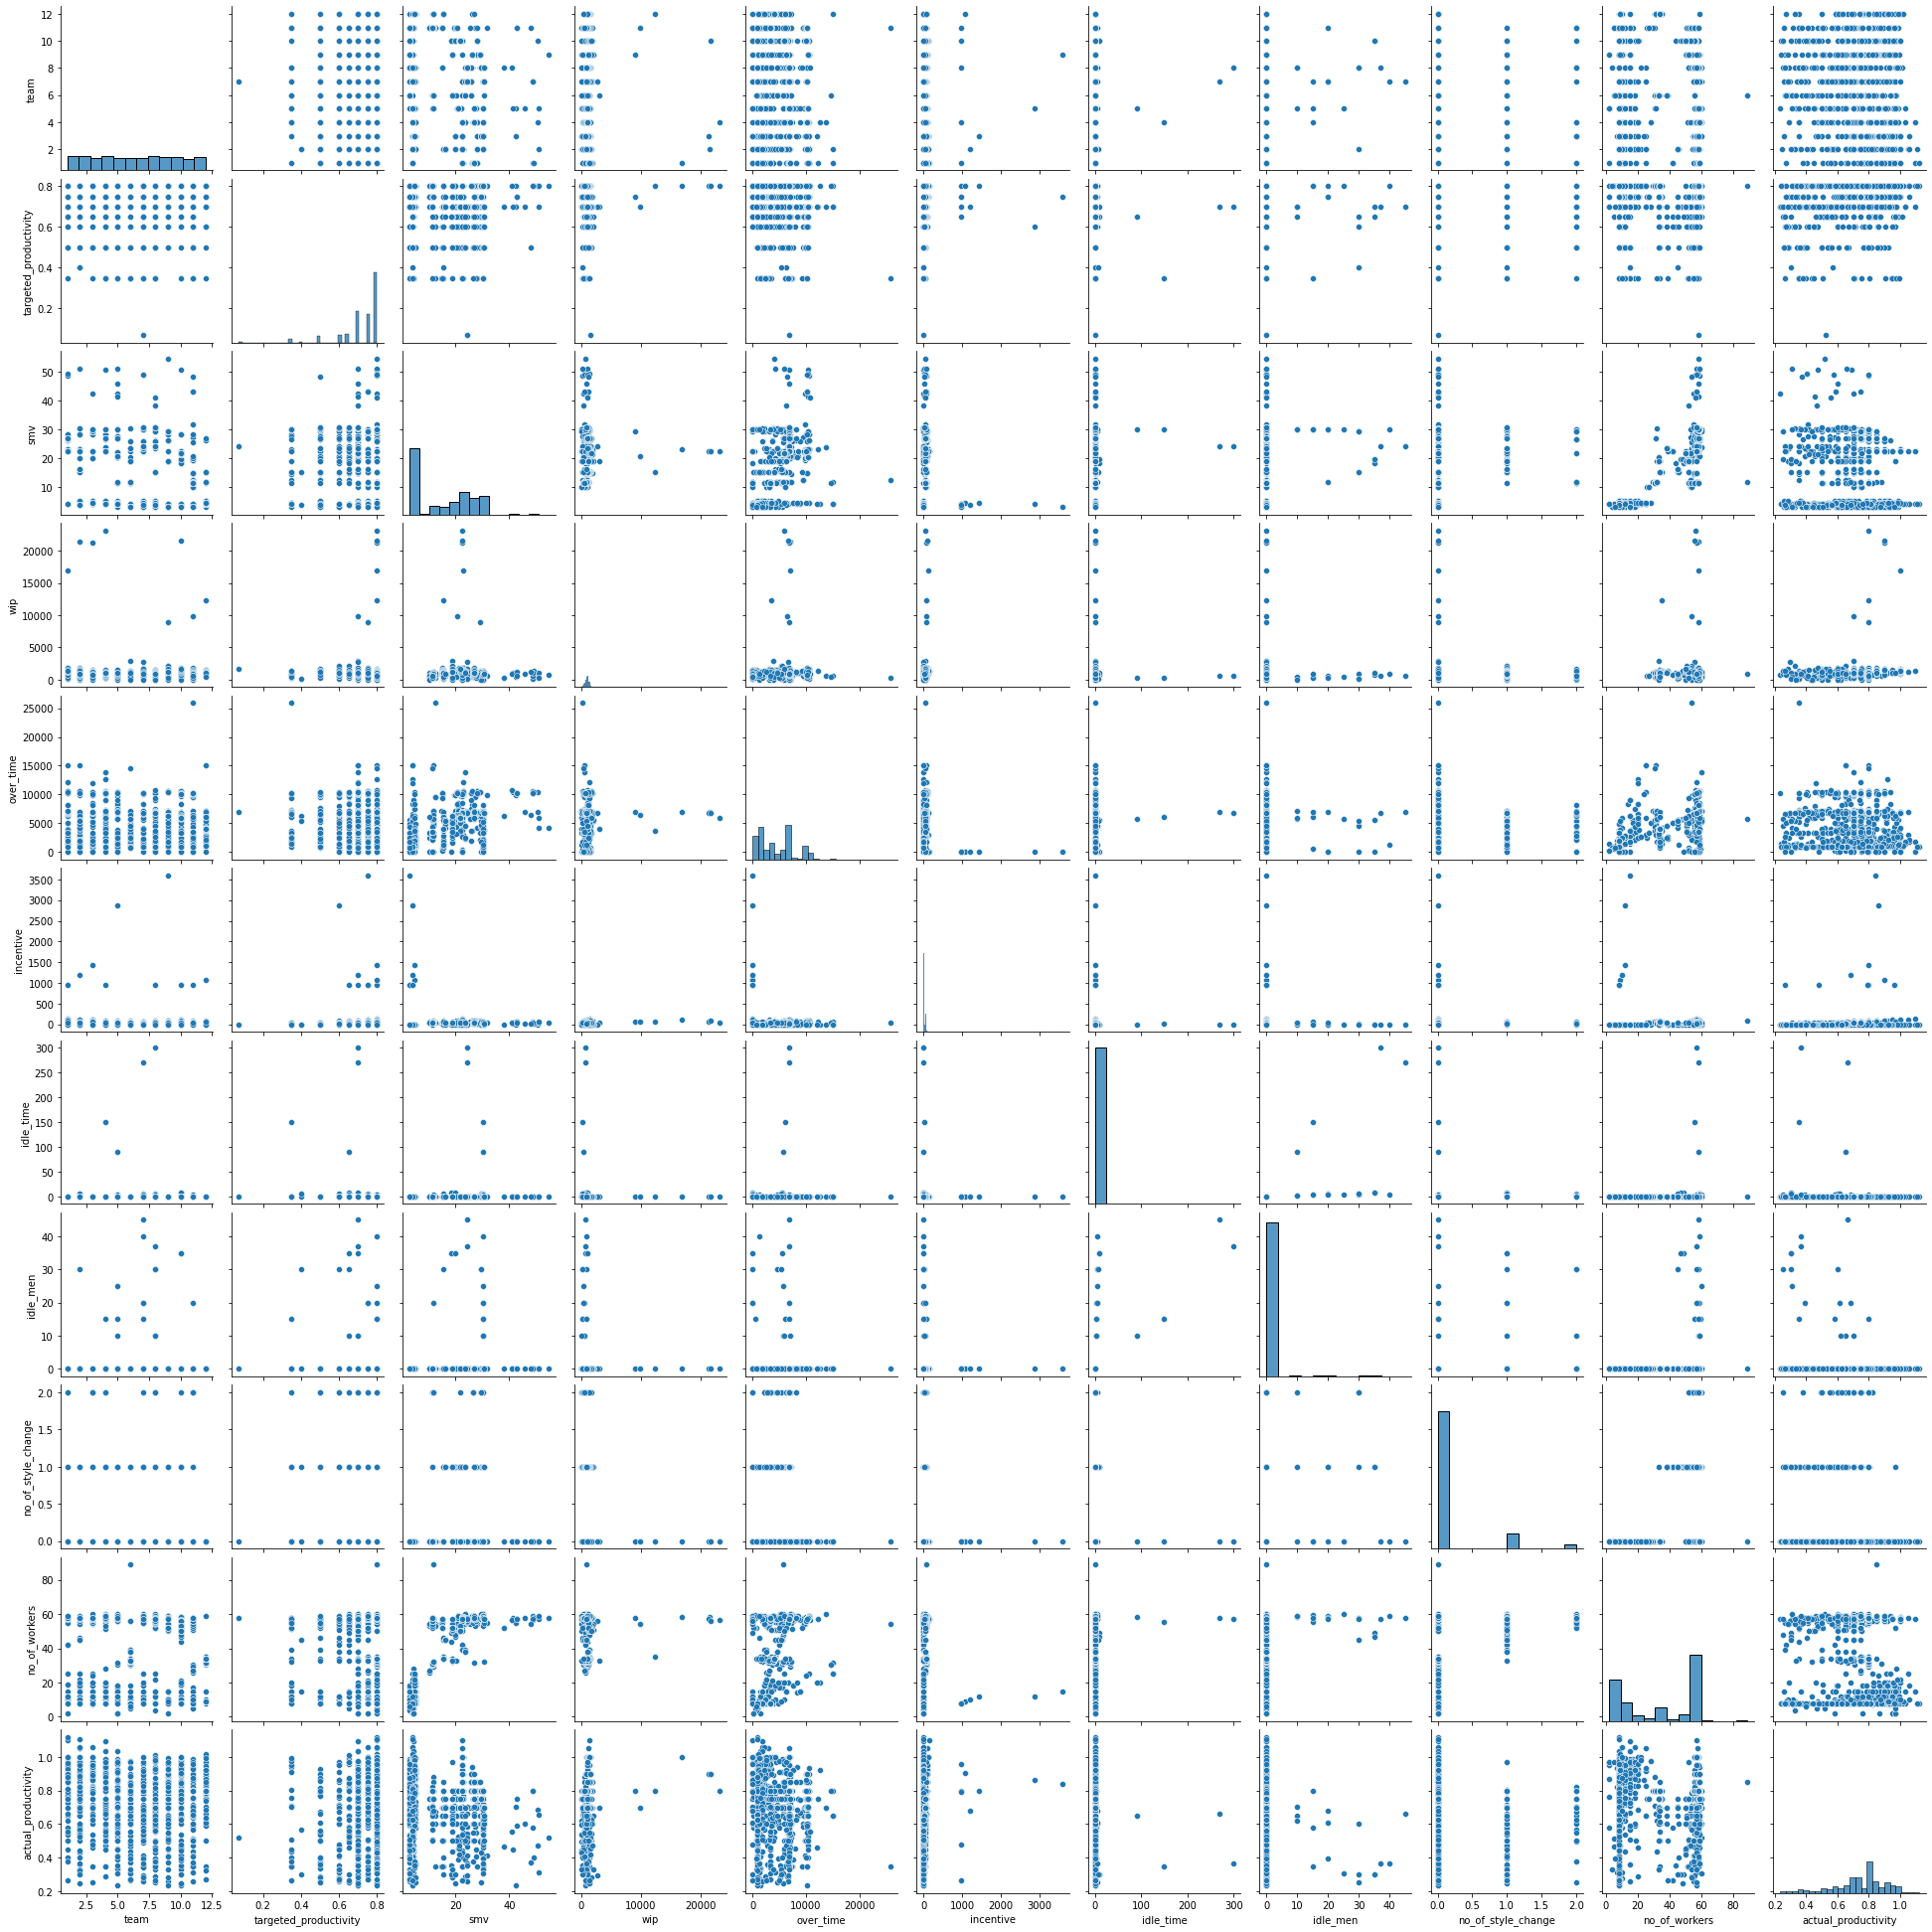

In [161]:
sns.pairplot(df)

# 2 - Data Preprocessing

# Missing data

Total 17 parameters.
One parameter (wip) has the missing rate up to 42%.

Total   Percent
wip           506  0.422723
date            0  0.000000
quarter         0  0.000000
department      0  0.000000
day             0  0.000000

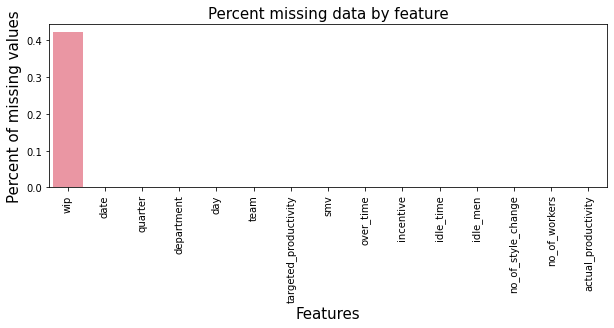

In [162]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(10, 3))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])

plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

missing_data.head()


## Add two new features

In [189]:
df['date'] = pd.to_datetime(df['date'])
df['month_name'] = df['date'].dt.month_name()
df['day_name'] = df['date'].dt.day_name()

## Create a new feature which has overtime measured in hours


In [88]:
df['overtime_in_hours'] = df['over_time'].apply(lambda x: x/60) 

# Divide data into two sub catergories.
Separate categorical and numerical for further analysis.

In [89]:
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')
for i in category.columns:
    print(f"{i}")
    print(category[i].unique())
    print()


quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

department
['sweing' 'finishing ' 'finishing']

day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

month_name
['January' 'February' 'March']

day_name
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']



## Fix the duplicate/typo error in department

In [90]:
#2x finishing => combine into 1
df['department'].value_counts().index.to_list()

['sweing', 'finishing ', 'finishing']

In [165]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )

In [92]:
#2x finishing => combine into 1
df['department'].value_counts().index.to_list()

['sewing', 'finishing']

## Numerical

In [93]:
numerical.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  \
count         1197.000000    1197.000000          1197.000000   
mean             0.150376      34.609858             0.735091   
std              0.427848      22.197687             0.174488   
min              0.000000       2.000000             0.233705   
25%              0.000000       9.000000             0.650307   
50%              0.000000      34.000000             0.773333   
75%              0.000000      57.000000             0.850253   
max              2.000000      89.000000             1.120437   

       overtime_in_hours  
count        1197.000000  
mean           76.124339  
std            55.813726  
min             0.000000  
25%            24.000000  
50%            66.000000  
75%           116.000000  
max           432.000000

## Category

In [94]:
category.describe()

quarter department        day month_name   day_name
count       1197       1197       1197       1197       1197
unique         5          3          6          3          6
top     Quarter1     sweing  Wednesday    January  Wednesday
freq         360        691        208        542        208

# Handling missing data

In [95]:
# Sort the value by team 
df.sort_values(by='team', ascending=True)

# Use kNN to handle missing value
imputer = KNNImputer(n_neighbors=5)
df['team'] = imputer.fit_transform(df[['team']])
df['wip'].fillna(0,inplace=True)

# Print the data
df

date   quarter department        day  team  targeted_productivity  \
0    2015-01-01  Quarter1     sewing   Thursday   8.0                   0.80   
1    2015-01-01  Quarter1  finishing   Thursday   1.0                   0.75   
2    2015-01-01  Quarter1     sewing   Thursday  11.0                   0.80   
3    2015-01-01  Quarter1     sewing   Thursday  12.0                   0.80   
4    2015-01-01  Quarter1     sewing   Thursday   6.0                   0.80   
...         ...       ...        ...        ...   ...                    ...   
1192 2015-03-11  Quarter2     sewing  Wednesday  10.0                   0.75   
1193 2015-03-11  Quarter2     sewing  Wednesday   8.0                   0.70   
1194 2015-03-11  Quarter2     sewing  Wednesday   7.0                   0.65   
1195 2015-03-11  Quarter2     sewing  Wednesday   9.0                   0.75   
1196 2015-03-11  Quarter2     sewing  Wednesday   6.0                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     0.0        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     0.0        960          0        0.0         0   
1193   3.90     0.0        960          0        0.0         0   
1194   3.90     0.0        960          0        0.0         0   
1195   2.90     0.0       1800          0        0.0         0   
1196   2.90     0.0        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity month_name  \
0                      0           59.0             0.940725    January   
1                      0            8.0             0.886500    January   
2                      0           30.5             0.800570    January   
3                      0           30.5             0.800570    January   
4                      0           56.0             0.800382    January   
...                  ...            ...                  ...        ...   
1192                   0            8.0             0.628333      March   
1193                   0            8.0             0.625625      March   
1194                   0            8.0             0.625625      March   
1195                   0           15.0             0.505889      March   
1196                   0            6.0             0.394722      March   

       day_name  overtime_in_hours  
0      Thursday              118.0  
1      Thursday               16.0  
2      Thursday               61.0  
3      Thursday               61.0  
4      Thursday               32.0  
...         ...                ...  
1192  Wednesday               16.0  
1193  Wednesday               16.0  
1194  Wednesday               16.0  
1195  Wednesday               30.0  
1196  Wednesday               12.0  

[1197 rows x 18 columns]

# 3 - Data Analysis

## 3.1 - Heatmap
<pre>
From here we can have some correlation pair:
    no_of_worker & smv
    no_of_worker & overtime
    actual_productivity & target_productivity
</pre>

<AxesSubplot:>

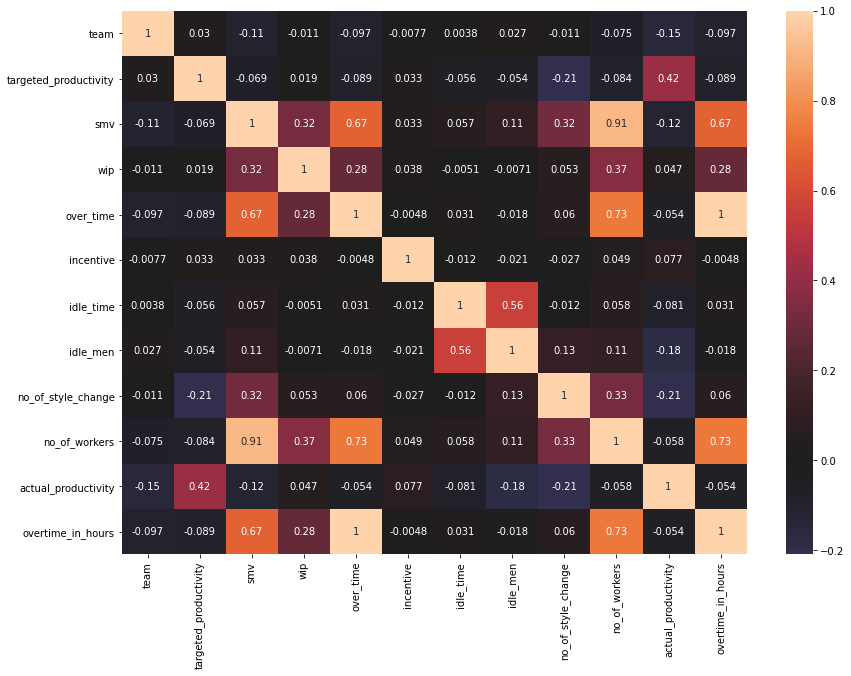

In [96]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, center=0)

## 3.2 - Quarter
<pre>
There are 5 quarter as quarter 1, quarter 2, quarter 3, quarter 4, quarter 5, which are not evenly distributed.
Quarter 5 only applied for Jan.
</pre>

In [97]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   quarters              5 non-null      object
 1   days_in_each_quarter  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


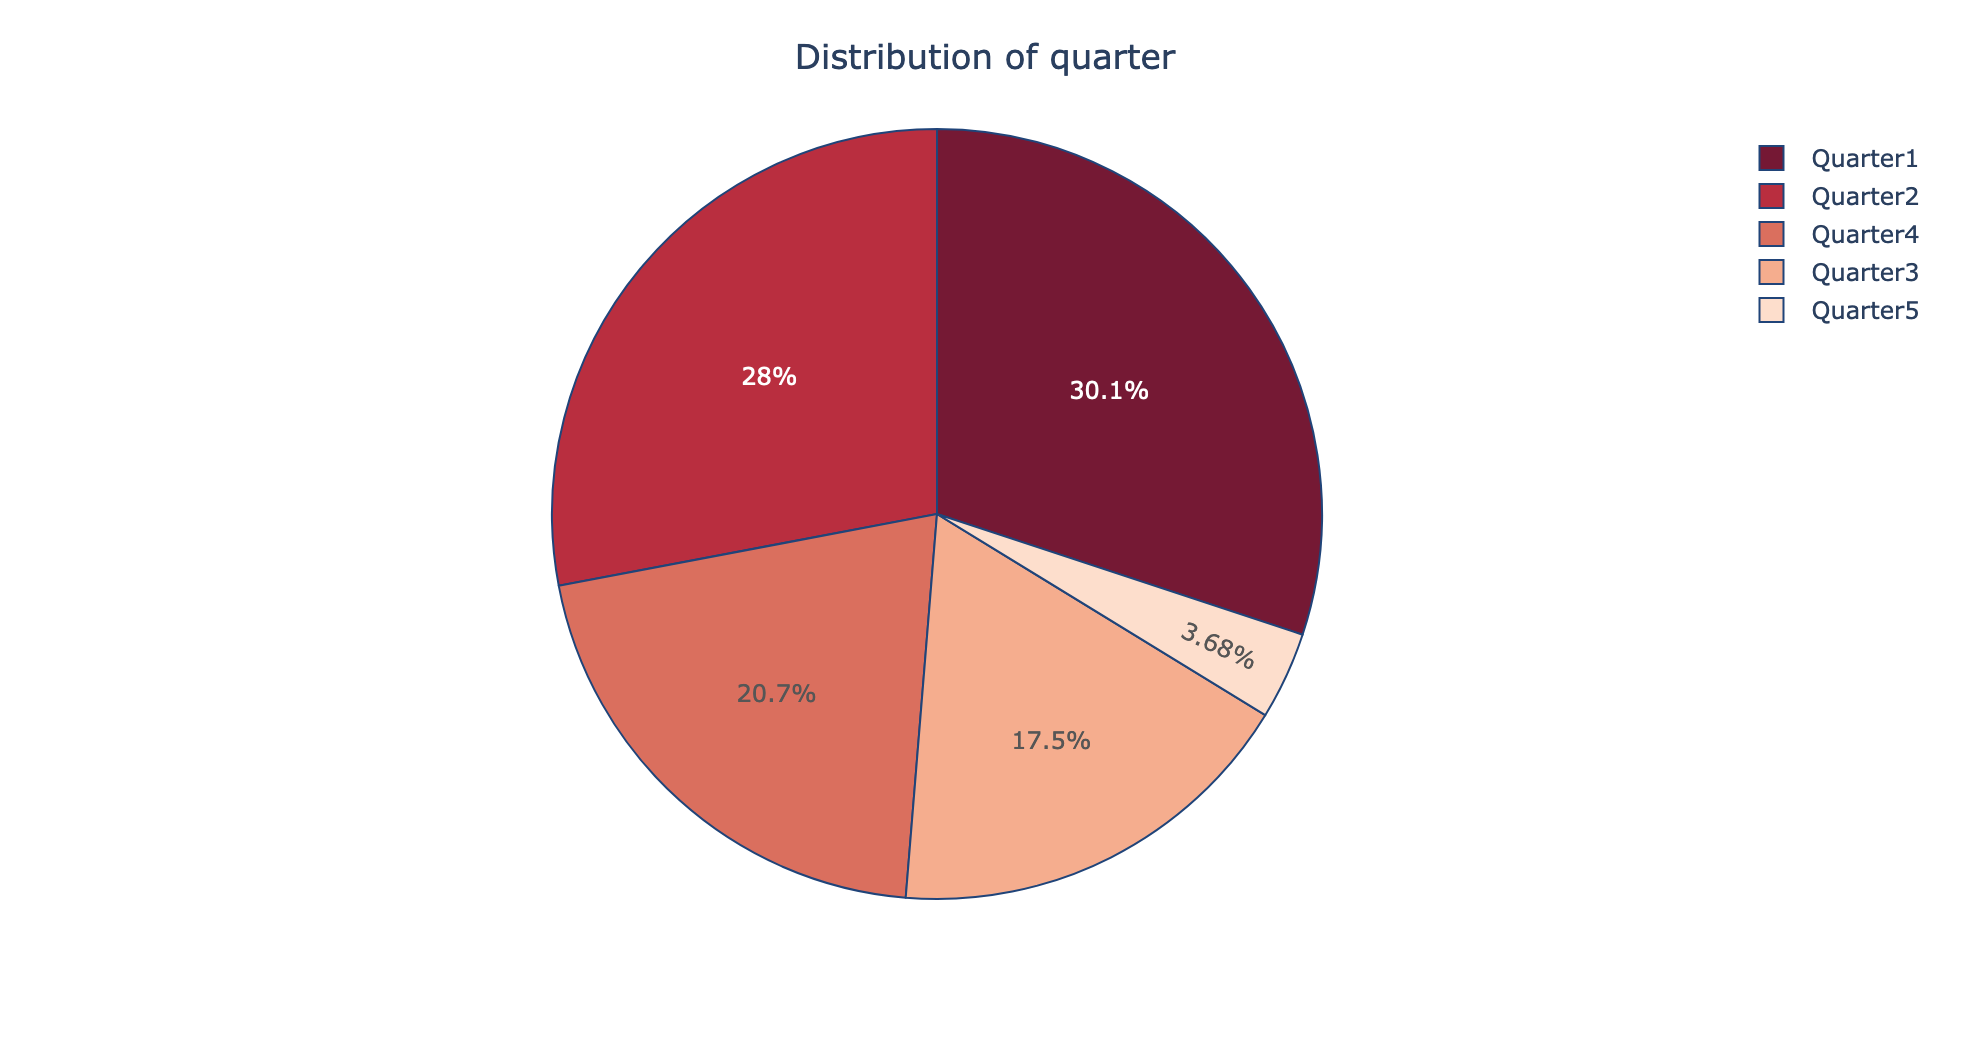

In [171]:
qdf = df['quarter'].value_counts().reset_index()
#print(qdf)
qdf.rename(columns={'index': 'quarters', 'quarter': 'days_in_each_quarter'}, inplace=True)
qdf.info()

fig = px.pie(values=qdf.days_in_each_quarter.to_list(), names=qdf.quarters.to_list(), color_discrete_sequence=px.colors.sequential.RdBu)
#print(qdf)
fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1, opacity=0.9, textposition='outside')
fig.update_traces(
    textposition='inside',
    textinfo='percent',
)

fig.update_layout(
    title = 'Distribution of quarter',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
)

fig.show()

## 3.3 - Department

In [163]:
df.department.value_counts() 

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

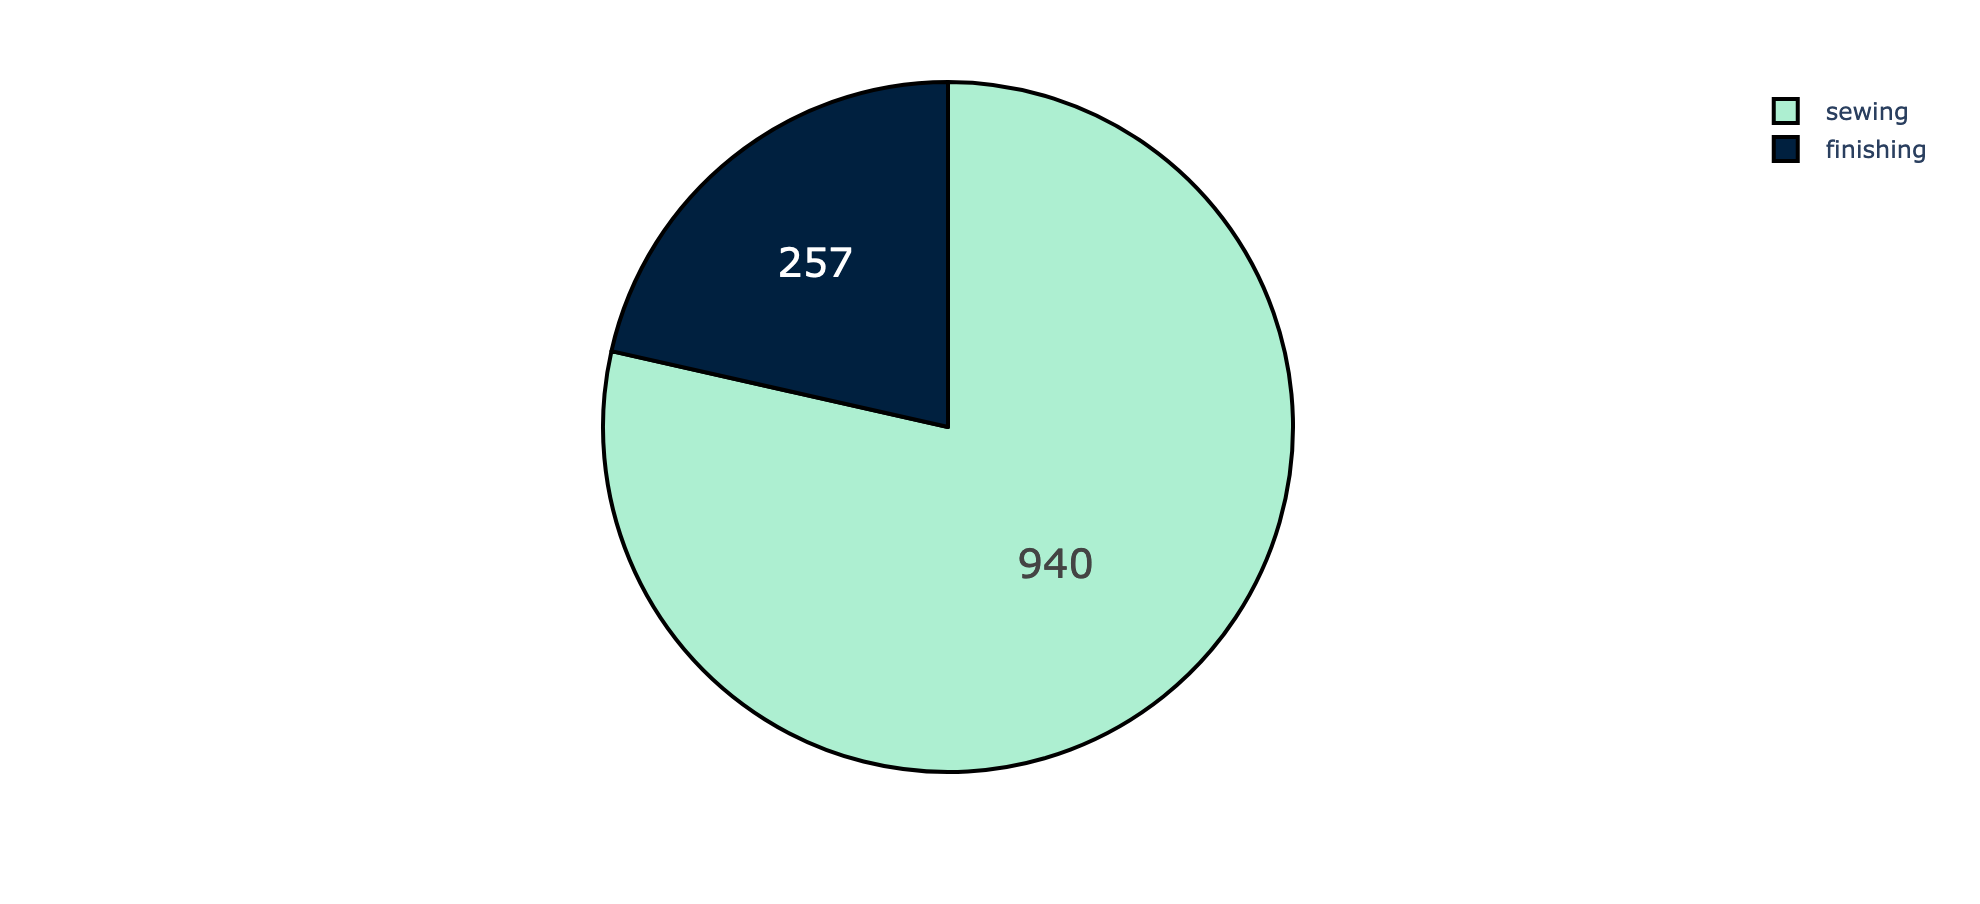

In [172]:
dept = df.department.value_counts().reset_index()
dept.rename(columns = {'index':'department', 'department':'total_num'},inplace=True)
#Data analysis

fig = go.Figure(data=[go.Pie(labels=dept.department.to_list(),
                             values=dept.total_num.to_list())])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#ADEFD1FF', '#00203FFF'], line=dict(color='#000000', width=2)))
fig.show()

# 3.4 - Day
<pre>
    Friday is a day off
</pre>    

In [101]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

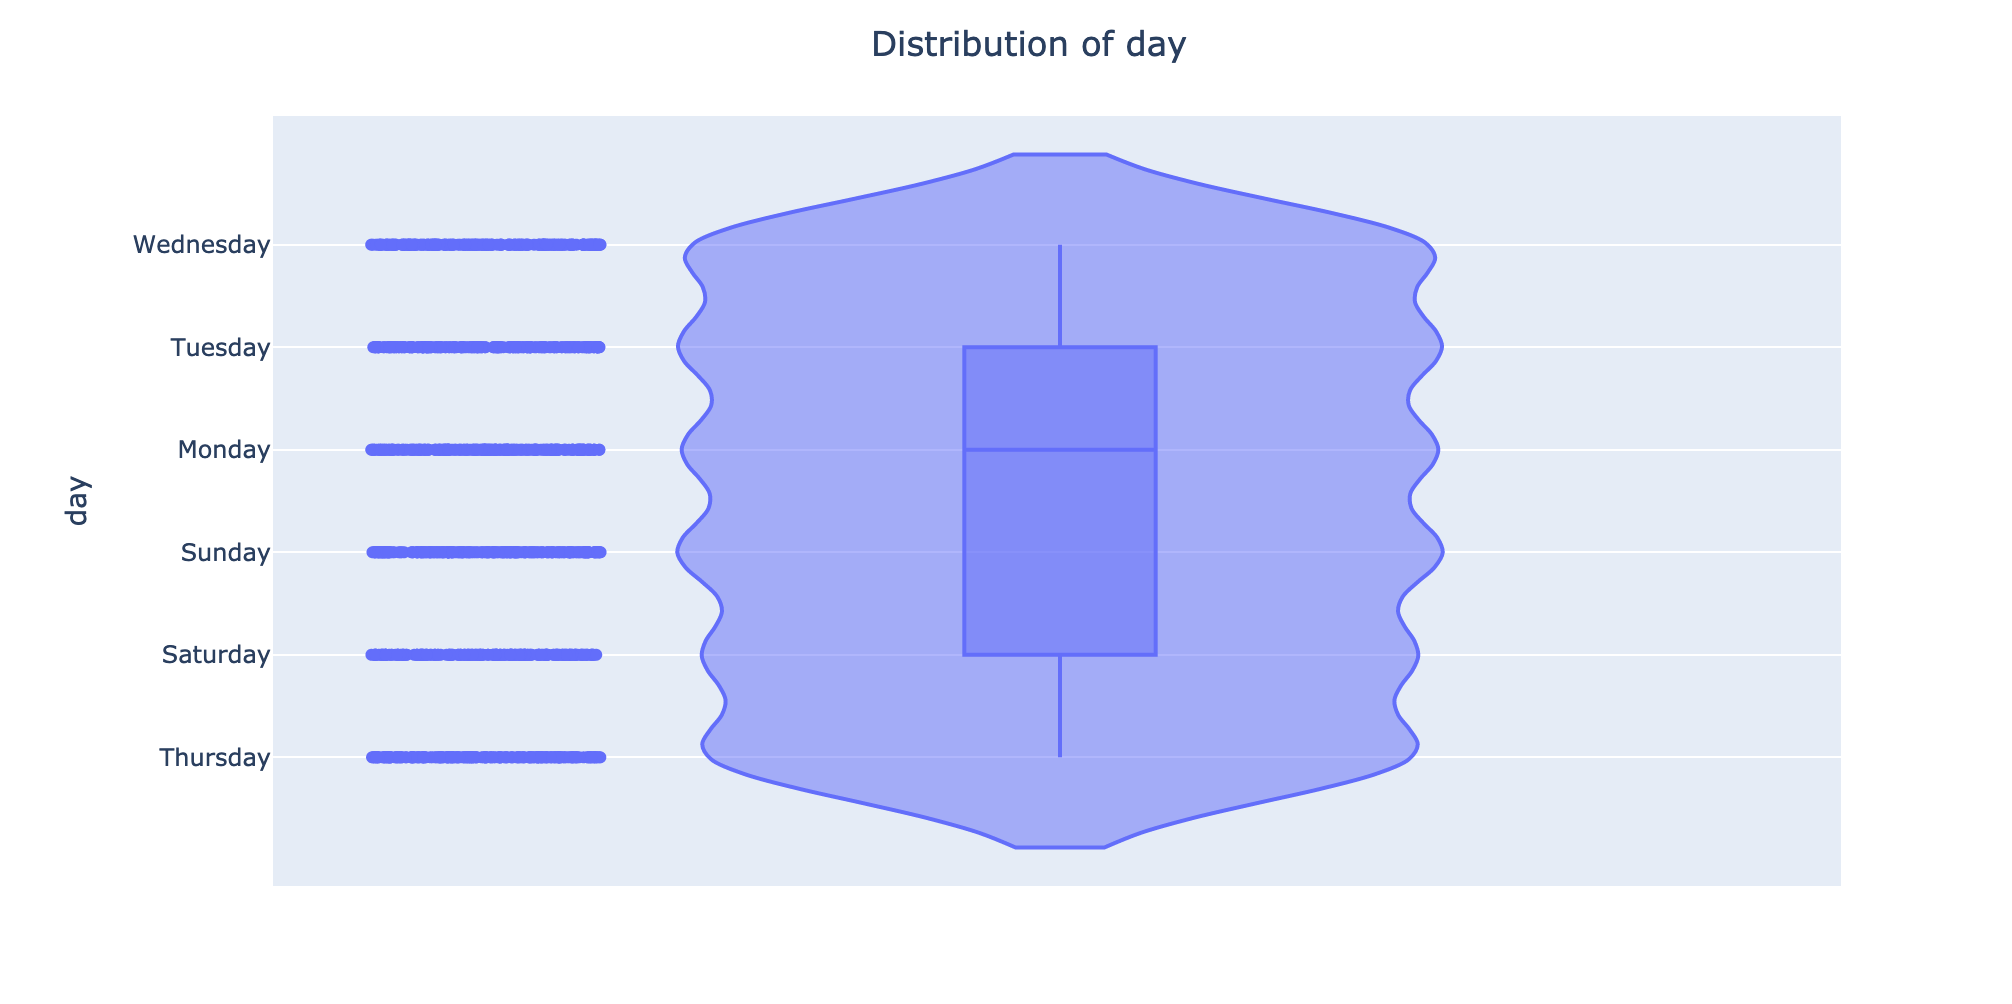

In [176]:
fig = px.violin(df, y="day", box=True, points='all')
fig.update_layout(title='Distribution of day', title_x=0.5)
fig.show()

# 3.5 - Team

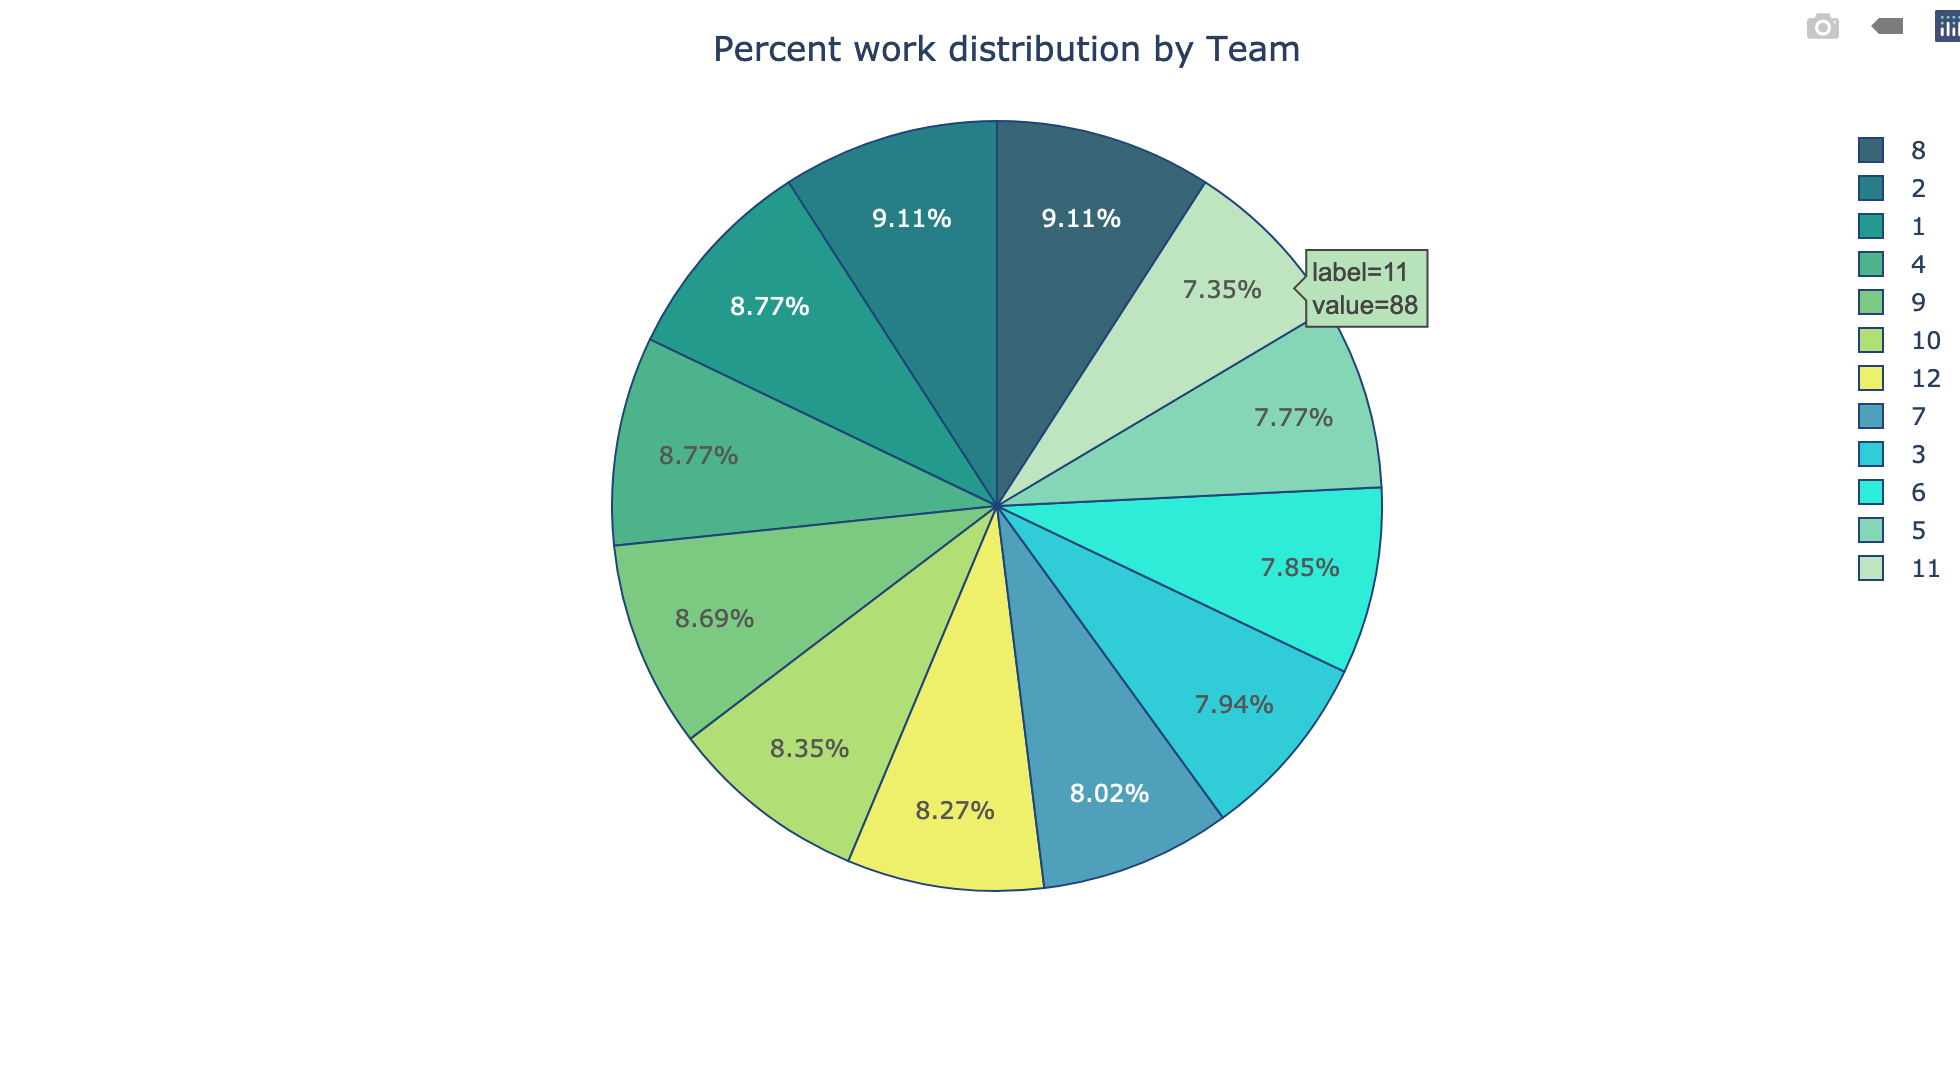

In [175]:
qdf = df['team'].value_counts().reset_index()
qdf.rename(columns={'index': 'teams', 'team': 'total_day'}, inplace=True)
fig = px.pie(
    values = qdf.total_day.to_list(),
    names = qdf.teams.to_list(),
    color_discrete_sequence = px.colors.sequential.Aggrnyl
)

fig.update_traces(
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1,
    opacity=0.9,
    textposition='outside'
)

fig.update_traces(
    textposition='inside',
    textinfo='percent',
)

fig.update_layout(
    title = 'Percent work distribution by Team',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
)

fig.show()

# 3.6 - Smv

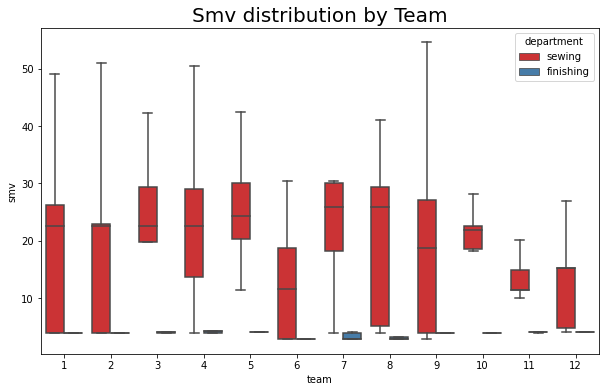

In [174]:
plt.figure(figsize=(10, 6))
palette = "Set1"

sns.boxplot(x="team", y="smv", hue="department", data = df,
     palette = palette, fliersize = 0)

plt.title('Smv distribution by Team', fontsize= 20)
plt.show()



# 3.7 - WIP
<pre>
Work in progress. Included unfinished items.
There are 12 dates which has high wip value.
Each record located in the sewing department from Feb 2nd to Feb 17th.
Feb 2nd has the highest value of WIP devided to each team.
</pre>

In [105]:
df[df['wip']>2000]

date   quarter department      day  team  targeted_productivity  \
561 2015-02-02  Quarter1     sewing   Monday   1.0                   0.80   
563 2015-02-02  Quarter1     sewing   Monday   2.0                   0.80   
564 2015-02-02  Quarter1     sewing   Monday   3.0                   0.80   
565 2015-02-02  Quarter1     sewing   Monday  10.0                   0.80   
568 2015-02-02  Quarter1     sewing   Monday  12.0                   0.80   
569 2015-02-02  Quarter1     sewing   Monday   4.0                   0.80   
570 2015-02-02  Quarter1     sewing   Monday   9.0                   0.75   
572 2015-02-02  Quarter1     sewing   Monday  11.0                   0.70   
573 2015-02-02  Quarter1     sewing   Monday   6.0                   0.70   
577 2015-02-02  Quarter1     sewing   Monday   7.0                   0.70   
801 2015-02-16  Quarter3     sewing   Monday   9.0                   0.60   
817 2015-02-17  Quarter3     sewing  Tuesday   9.0                   0.65   

       smv      wip  over_time  incentive  idle_time  idle_men  \
561  22.94  16882.0       7020        113        0.0         0   
563  22.52  21385.0       7020         88        0.0         0   
564  22.52  21266.0       6840         70        0.0         0   
565  22.52  21540.0       6720         88        0.0         0   
568  15.26  12261.0       3600         63        0.0         0   
569  22.52  23122.0       5940         50        0.0         0   
570  29.12   8992.0       6960         55        0.0         0   
572  20.55   9792.0       6480         60        0.0         0   
573  18.79   2984.0       3960         30        0.0         0   
577  24.26   2698.0       6720          0        0.0         0   
801  18.79   2103.0       5400          0        0.0         0   
817  18.79   2120.0       5520          0        0.0         0   

     no_of_style_change  no_of_workers  actual_productivity month_name  \
561                   0           58.5             1.000602   February   
563                   0           58.5             0.900158   February   
564                   0           57.0             0.900142   February   
565                   0           56.0             0.900130   February   
568                   0           35.0             0.800402   February   
569                   0           56.5             0.800393   February   
570                   0           58.0             0.799963   February   
572                   0           54.0             0.700398   February   
573                   0           33.0             0.700355   February   
577                   0           56.0             0.295308   February   
801                   1           54.0             0.329965   February   
817                   1           51.0             0.650134   February   

    day_name  overtime_in_hours  
561   Monday              117.0  
563   Monday              117.0  
564   Monday              114.0  
565   Monday              112.0  
568   Monday               60.0  
569   Monday               99.0  
570   Monday              116.0  
572   Monday              108.0  
573   Monday               66.0  
577   Monday              112.0  
801   Monday               90.0  
817  Tuesday               92.0

# 3.8 - Over Time

<pre>
    Team 6 and 12 has the lowest over time in hours.
</pre>    

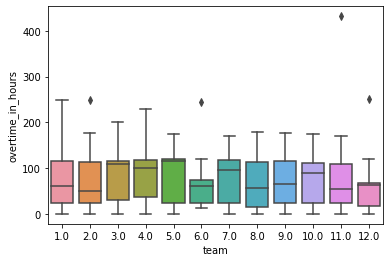

In [106]:
sns.boxplot(x='team',y='overtime_in_hours',data=df)
plt.show()

# 3.9 - Productivity

## Actual productivity in days of the week.
<pre>
    Saturday has the highest productivity
</pre>    

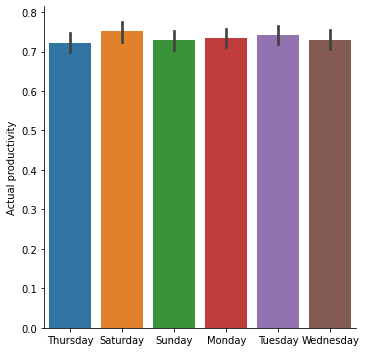

In [107]:
df['date'] = pd.to_datetime(df['date'])
df['month_name'] = df['date'].dt.month_name()
df['day_name'] = df['date'].dt.day_name()
fig = sns.catplot(
    data = df,
    x = "day_name", 
    y = "actual_productivity", 
    kind = "bar",
    dodge = True,
)

fig.set_axis_labels("", "Actual productivity")

## Actual productivity in months.
<pre>
    Janurary has the highest productivity month.
</pre>

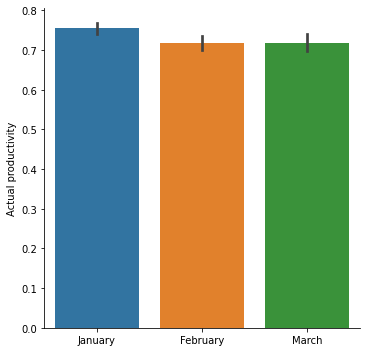

In [108]:
fig = sns.catplot(
    data = df,
    x = "month_name", 
    y = "actual_productivity", 
    kind="bar",
    dodge=True,
)
fig.set_axis_labels("", "Actual productivity")

## Actual productivity in quarters.

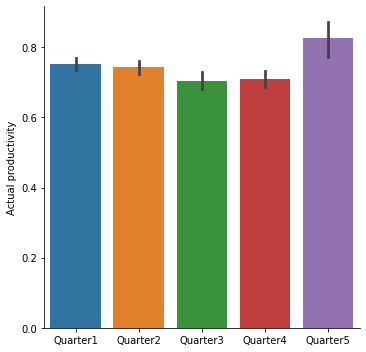

In [109]:
fig = sns.catplot(
    data = df,
    x = "quarter", 
    y = "actual_productivity", 
    kind="bar",
    dodge=True,
)
fig.set_axis_labels("", "Actual productivity")

## Actual productivity by teams

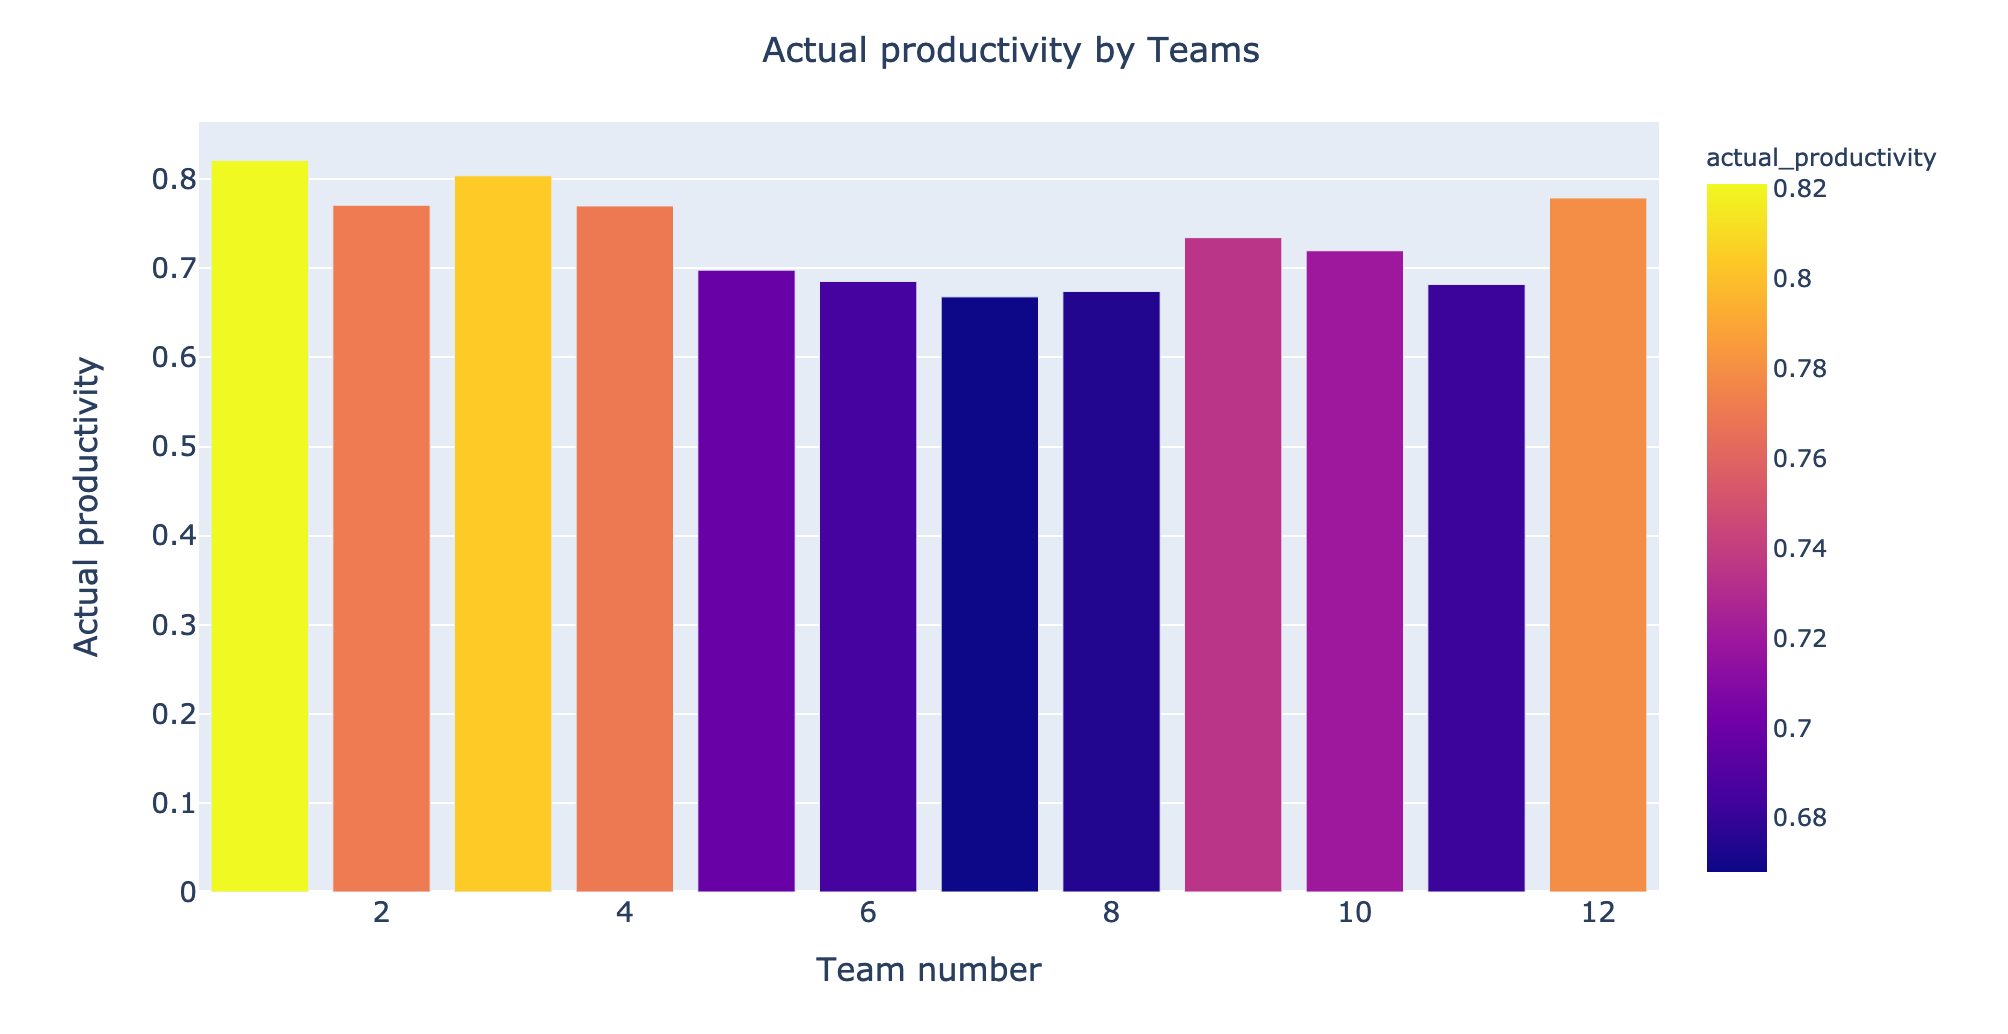

In [182]:
teamdf = df[['team', 'actual_productivity']].groupby('team').mean()
teamdf = teamdf.sort_values('actual_productivity', ascending=False).reset_index()

colors = px.colors.sequential.RdBu[:12]

fig = px.bar(teamdf, 
    x="team", 
    y="actual_productivity", 
    color='actual_productivity',
)

fig.update_layout(
    xaxis=dict(
        title='Team number',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Actual productivity',
        titlefont_size=16,
        tickfont_size=14,
    ),
    title_text='Actual productivity by Teams',
    title_x=0.5,
    xaxis_tickfont_size = 14,
)

fig.show()


## Target productivity by teams

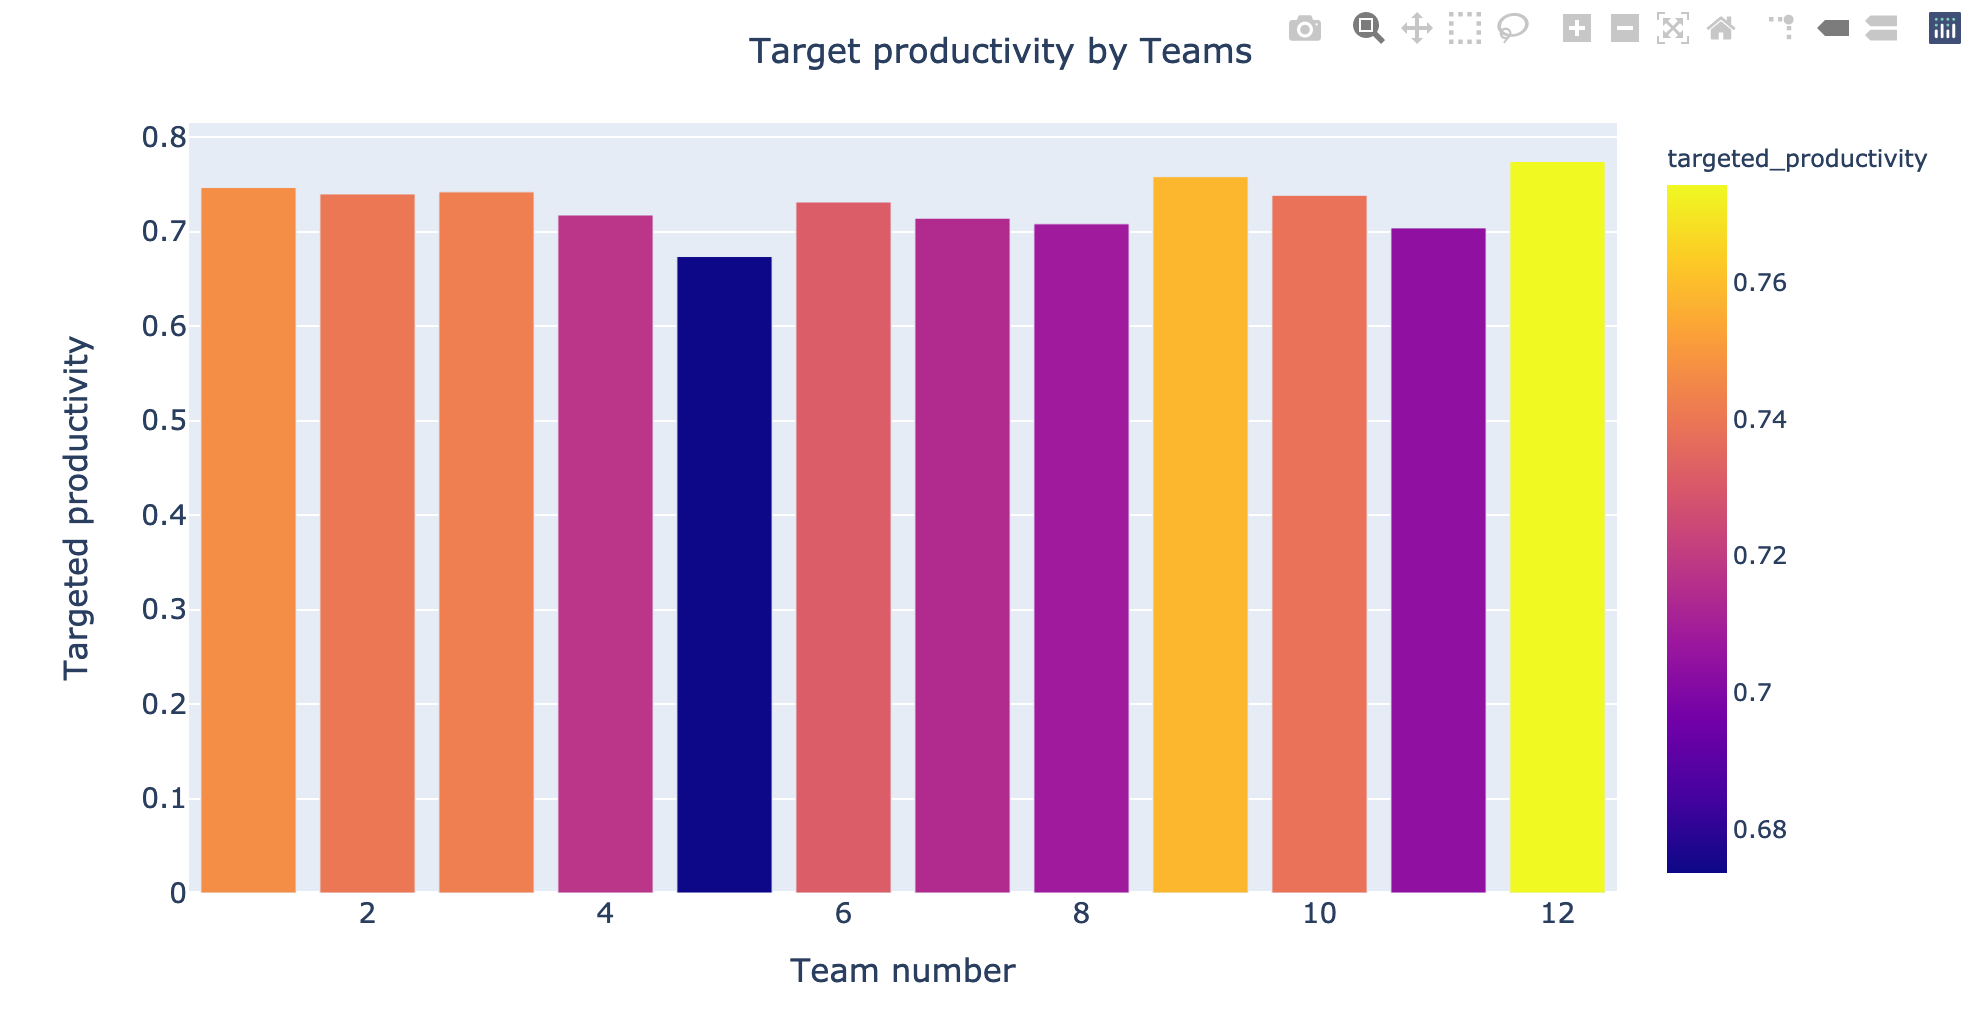

In [183]:
teamdf = df[['team', 'targeted_productivity']].groupby('team').mean()
teamdf = teamdf.sort_values('targeted_productivity', ascending=False).reset_index()

colors = px.colors.sequential.RdBu[:12]

fig = px.bar(teamdf, 
    x="team", 
    y="targeted_productivity", 
    color='targeted_productivity',
)



fig.update_layout(
    title_text='Target productivity by Teams',
    title_x=0.5,
    xaxis_tickfont_size = 14,
)

fig.update_layout(
    xaxis=dict(
        title='Team number',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Targeted productivity',
        titlefont_size=16,
        tickfont_size=14,
    ),
    title_text='Target productivity by Teams',
    title_x=0.5,
    xaxis_tickfont_size = 14,
)


fig.show()

## Distribution of Targeted productivity

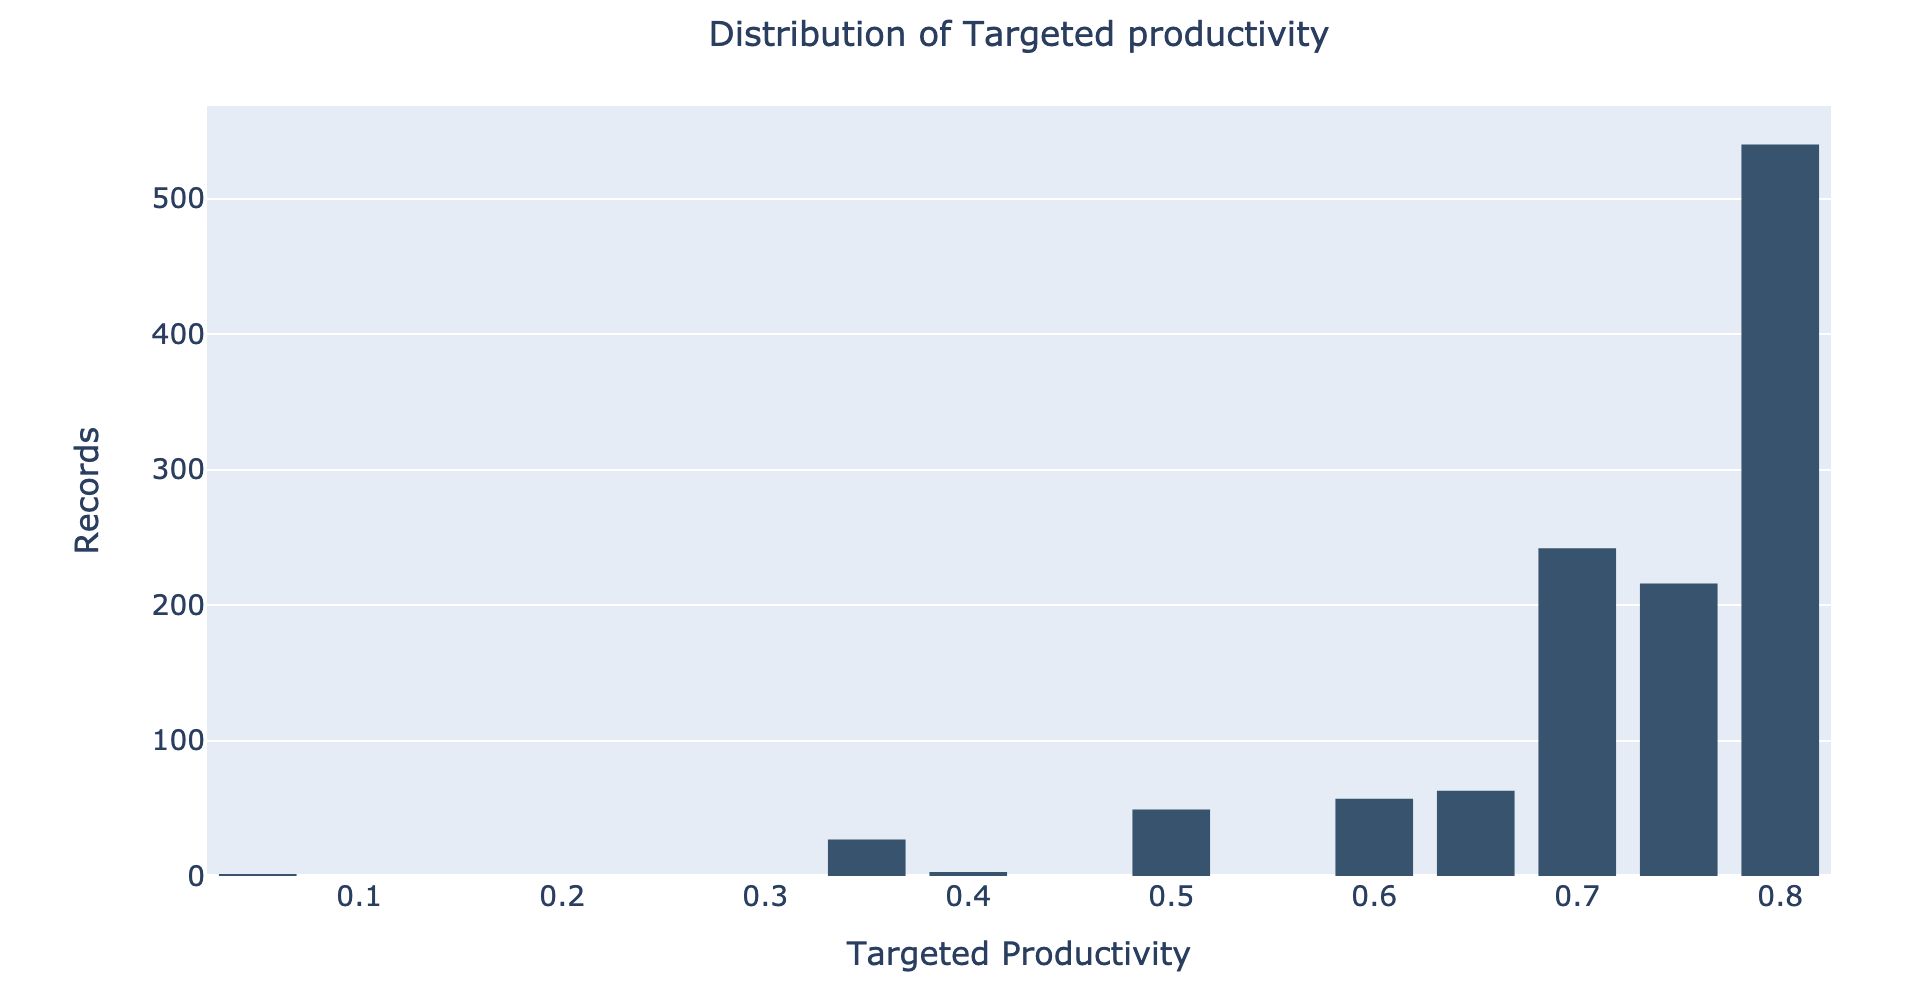

In [184]:
fig = px.histogram(df, x="targeted_productivity", nbins=20, color_discrete_sequence=['rgb(55, 83, 109)'])

fig.update_layout(
    title = 'Distribution of Targeted productivity',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
    
    xaxis = dict(
        title = 'Targeted Productivity',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    
    yaxis = dict(
        title = 'Records',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    barmode = 'group',
    bargap = 0.15,
    bargroupgap = 0.1,
)

fig.show()


## Distribution of Actual productivity

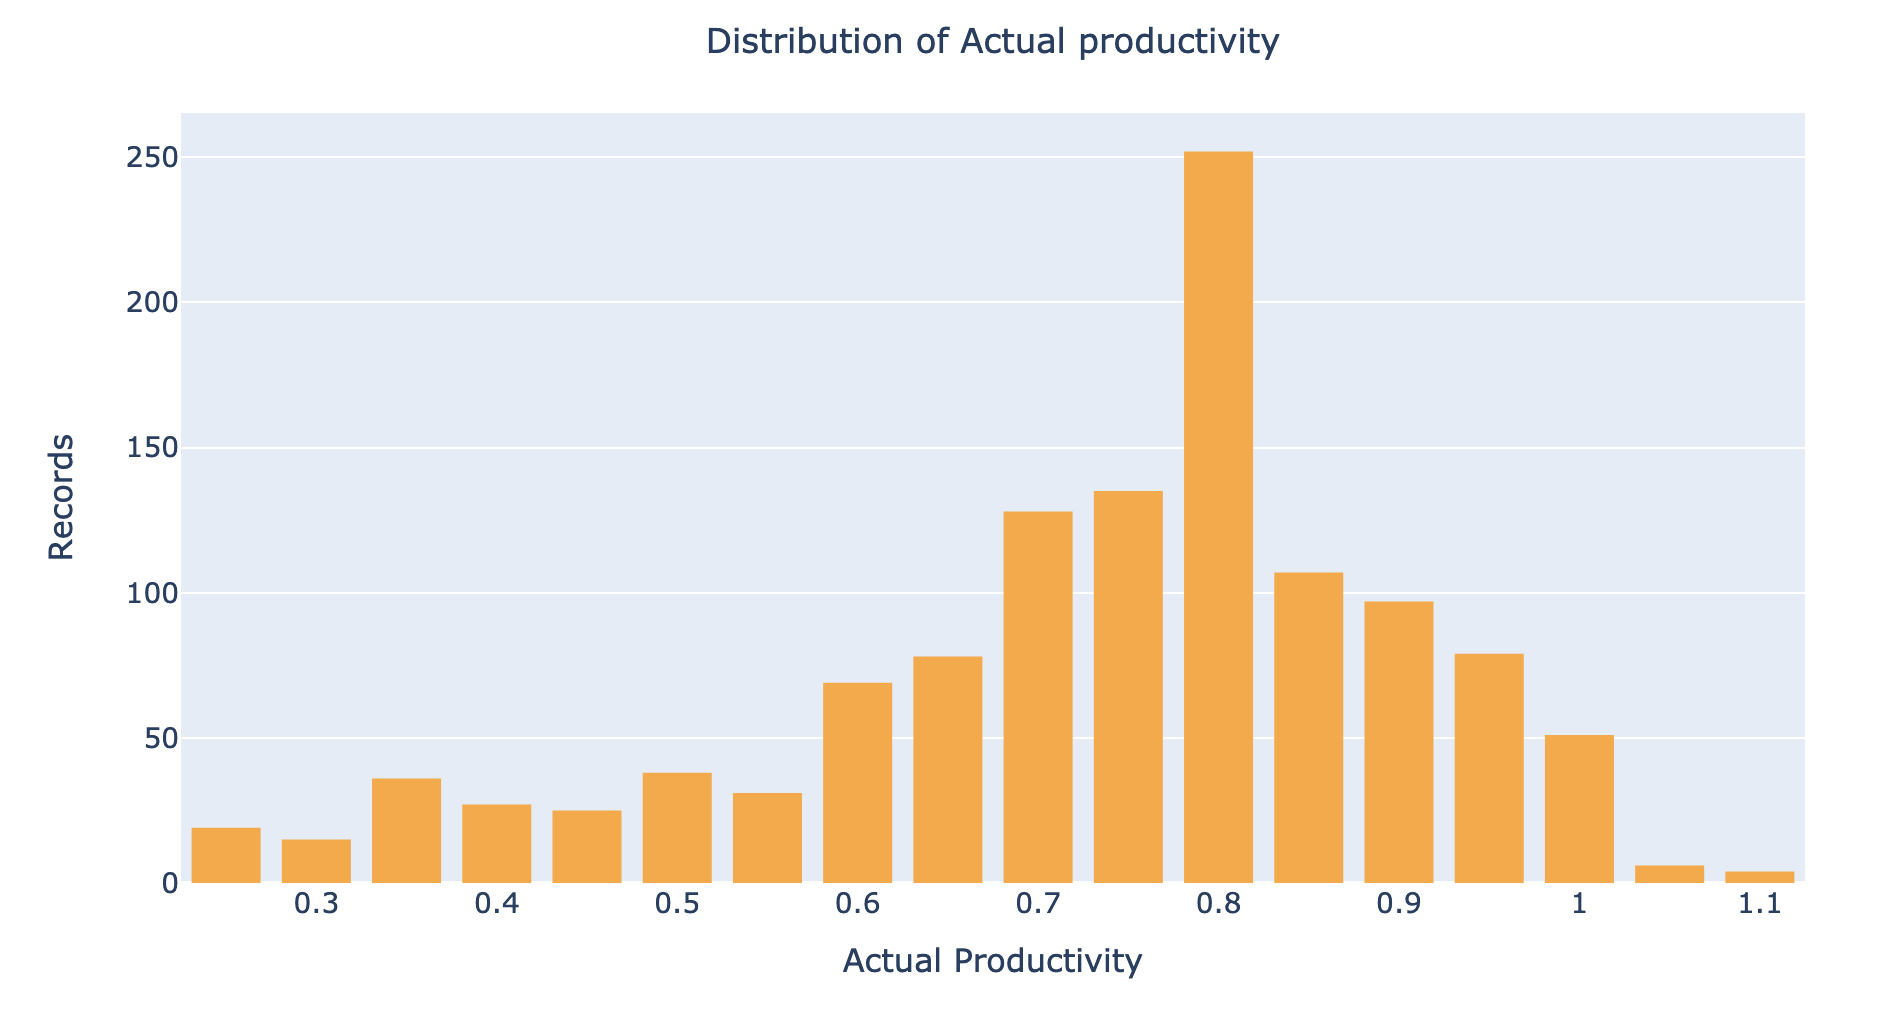

In [185]:
fig = px.histogram(df, x="actual_productivity", nbins=20, color_discrete_sequence=['rgb(242,170,76)'])

fig.update_layout(
    title = 'Distribution of Actual productivity',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
    
    xaxis = dict(
        title = 'Actual Productivity',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    
    yaxis = dict(
        title = 'Records',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    
    barmode = 'group',
    bargap = 0.15,
    bargroupgap = 0.1,
)

fig.show()

## Actual productivity vs Targeted productivity

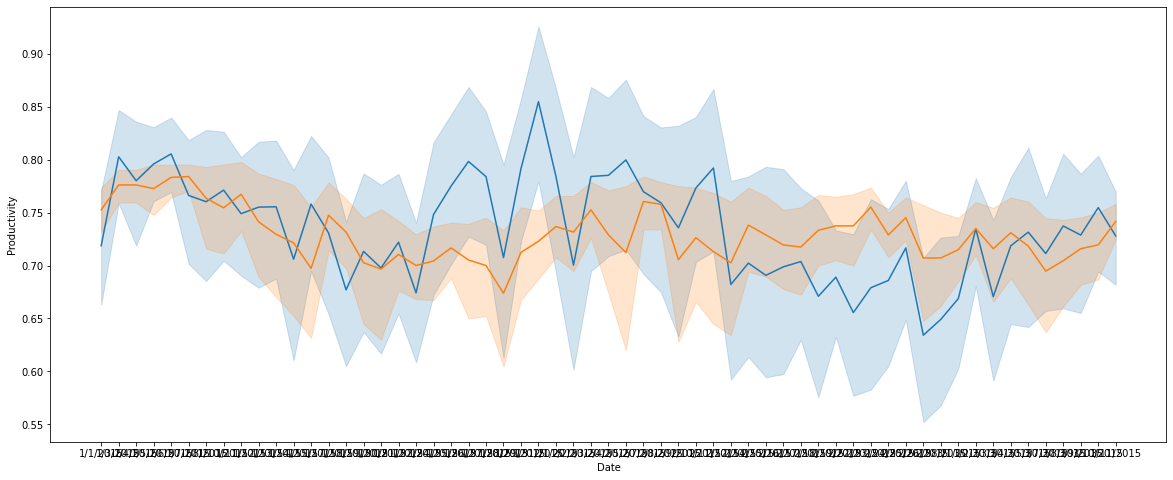

In [114]:
plt.figure(figsize = (20,8))
palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(
    y= 'actual_productivity',
    x='date',
    data=data,
    legend = 'brief',
    palette=palette,
)

ax = sns.lineplot(
    y='targeted_productivity',
    x='date' ,
    data =data,
    legend='brief',
    palette=palette,
)
#color_discrete_sequence=px.colors.qualitative.G10


ax.set(xlabel = 'Date', ylabel = 'Productivity')

plt.show()


## Productivity in day of the week

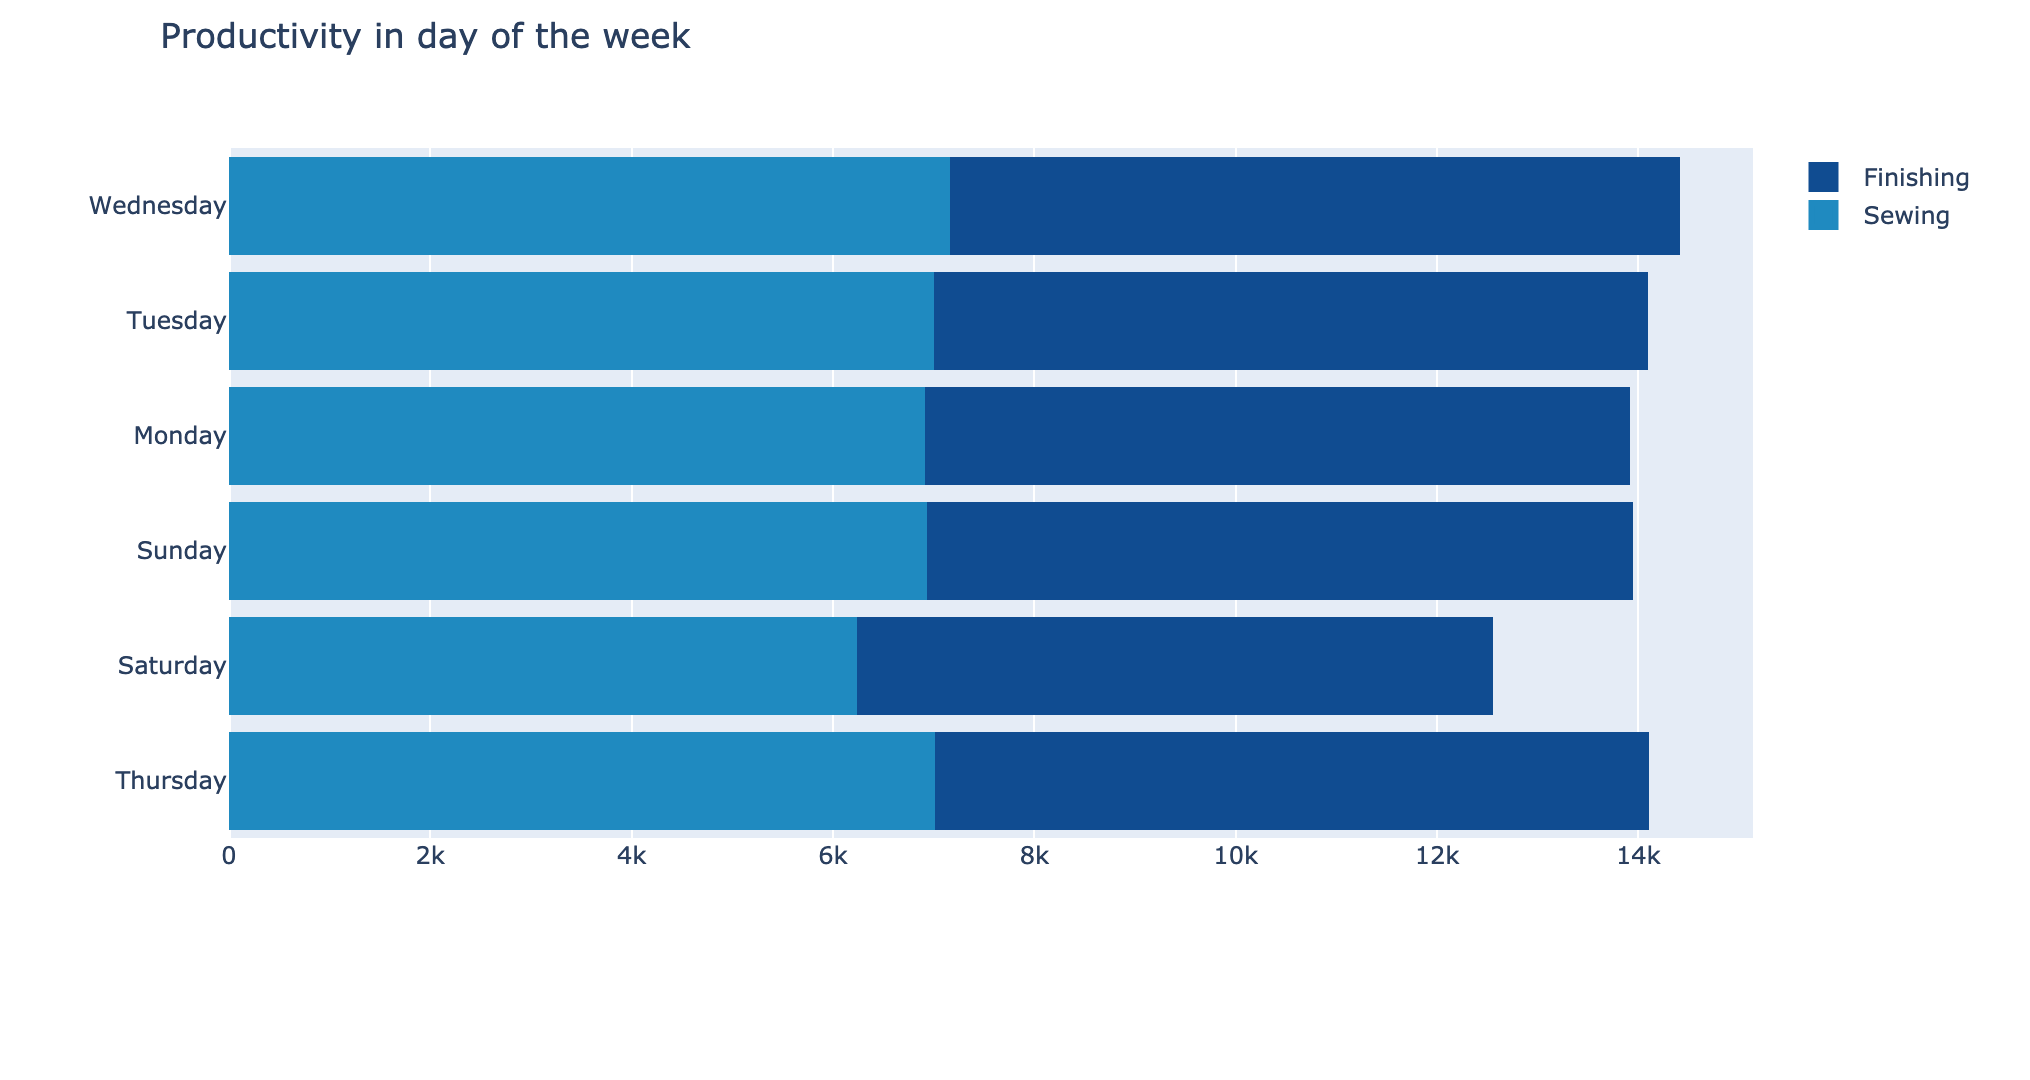

In [187]:
# Check the Productivity in day of the week

fig = go.Figure()
fig.add_trace(go.Bar(
    y=df['day'].to_list(),
    x=df['no_of_workers'].to_list(),
    name='Sewing',
    marker=dict(
        color='rgb(31,138,192)',
        line=dict(color='rgb(31,138,192)', width=3)
    ),
    orientation='h',
))

fig.add_trace(go.Bar(
    y=df['day'].to_list(),
    x=df['no_of_workers'].to_list(),
    name='Finishing',
    marker=dict(
        color='rgb(16,76,145)',
        line=dict(color='rgb(16,76,145)', width=3)
    ),
    orientation='h',
))

fig.update_layout(
    title = 'Productivity in day of the week',
    barmode = 'stack'
)

fig.show()

## Productivity in month

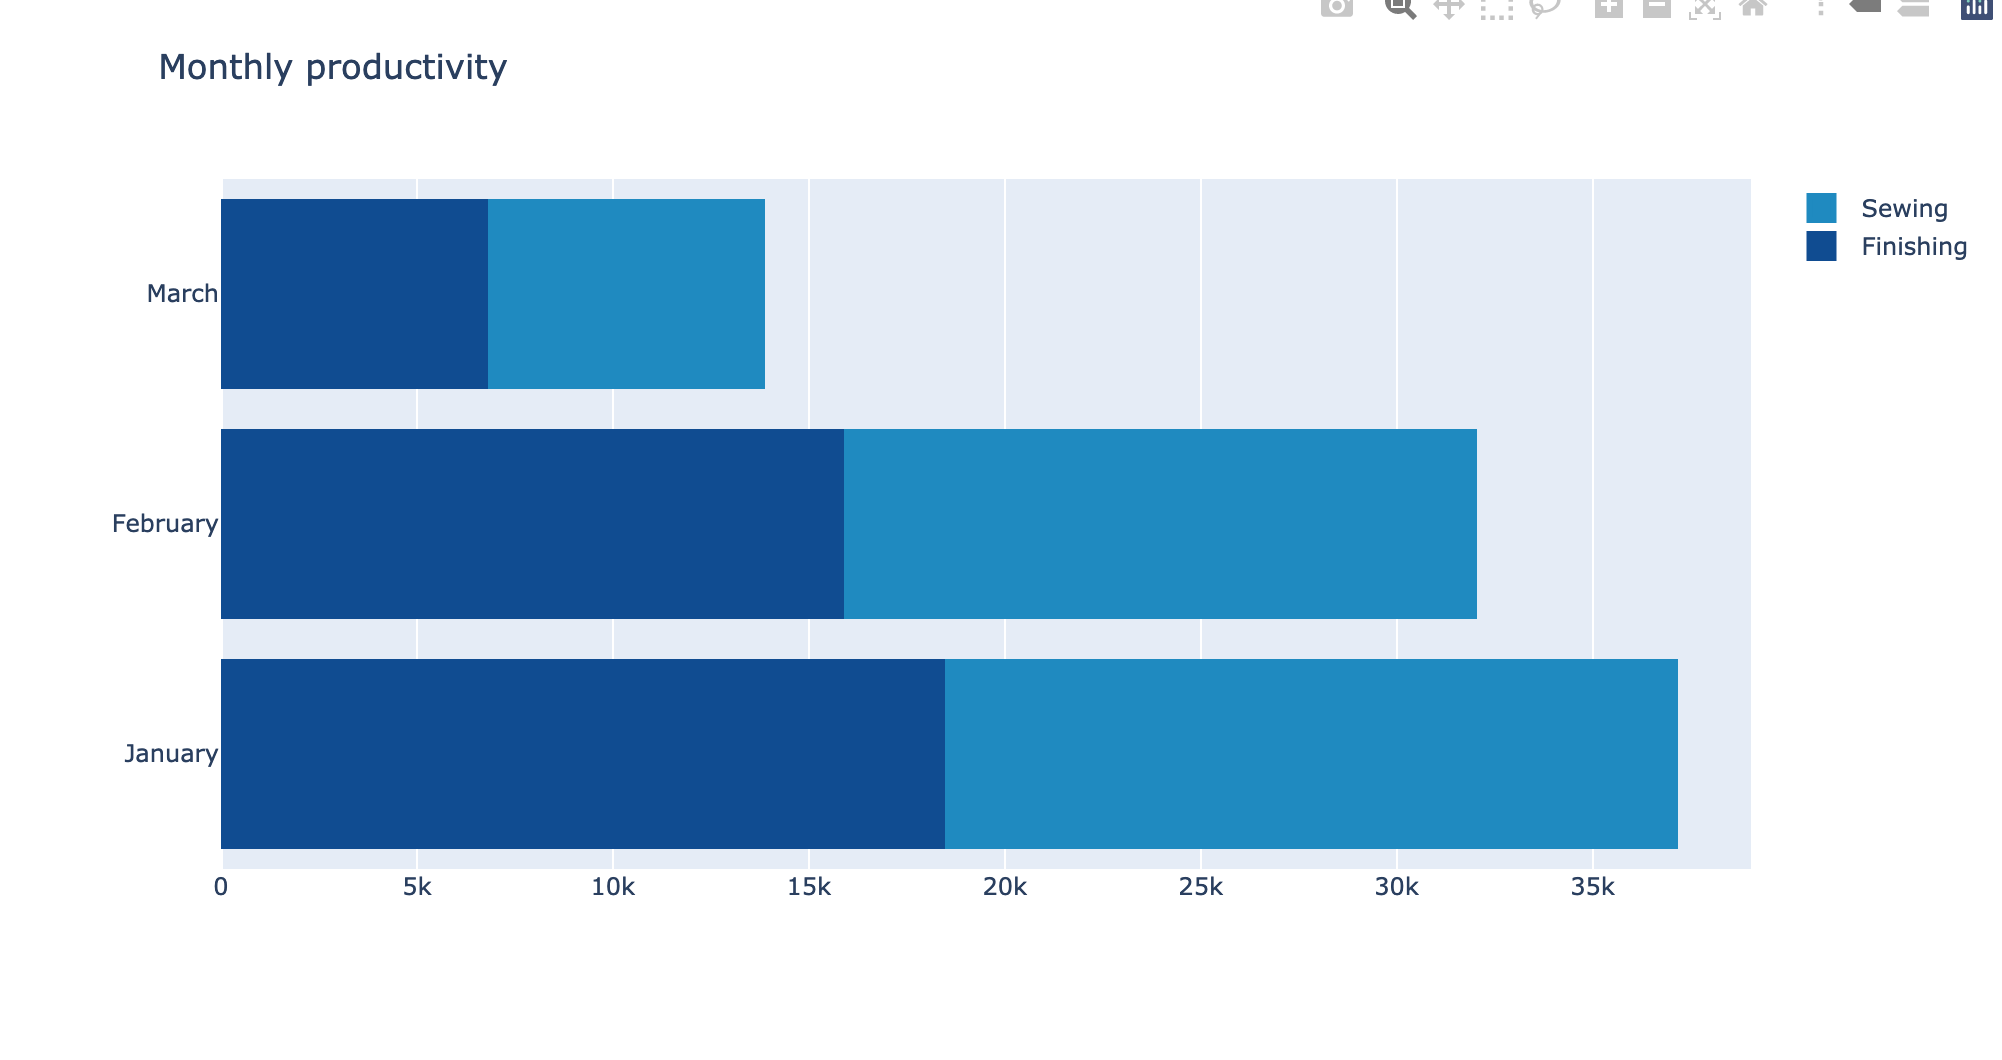

In [190]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=df['month_name'].to_list(),
    x=df['no_of_workers'].to_list(),
    name='Finishing',
    marker=dict(
        color='rgb(16,76,145)',
        line=dict(color='rgb(16,76,145)', width=3)
    ),
    orientation='h',
))

fig.add_trace(go.Bar(
    y=df['month_name'].to_list(),
    x=df['no_of_workers'].to_list(),
    name='Sewing',
    marker=dict(
        color='rgb(31,138,192)',
        line=dict(color='rgb(31,138,192)', width=3)
    ),
    orientation='h',
))

fig.update_layout(
    title = 'Monthly productivity',
    barmode = 'stack'
)

fig.show()

## Ratio productivity of number of workers w.r.t style changes

<pre>
Higher style change => Lower productivity
</pre>

    team  actual_productivity
0      7             0.669534
1      8             0.669728
2     11             0.681985
3      6             0.682244
4      5             0.696809
5     10             0.719736
6      9             0.734462
7      4             0.762997
8      2             0.770855
9     12             0.779055
10     3             0.803880
11     1             0.821054


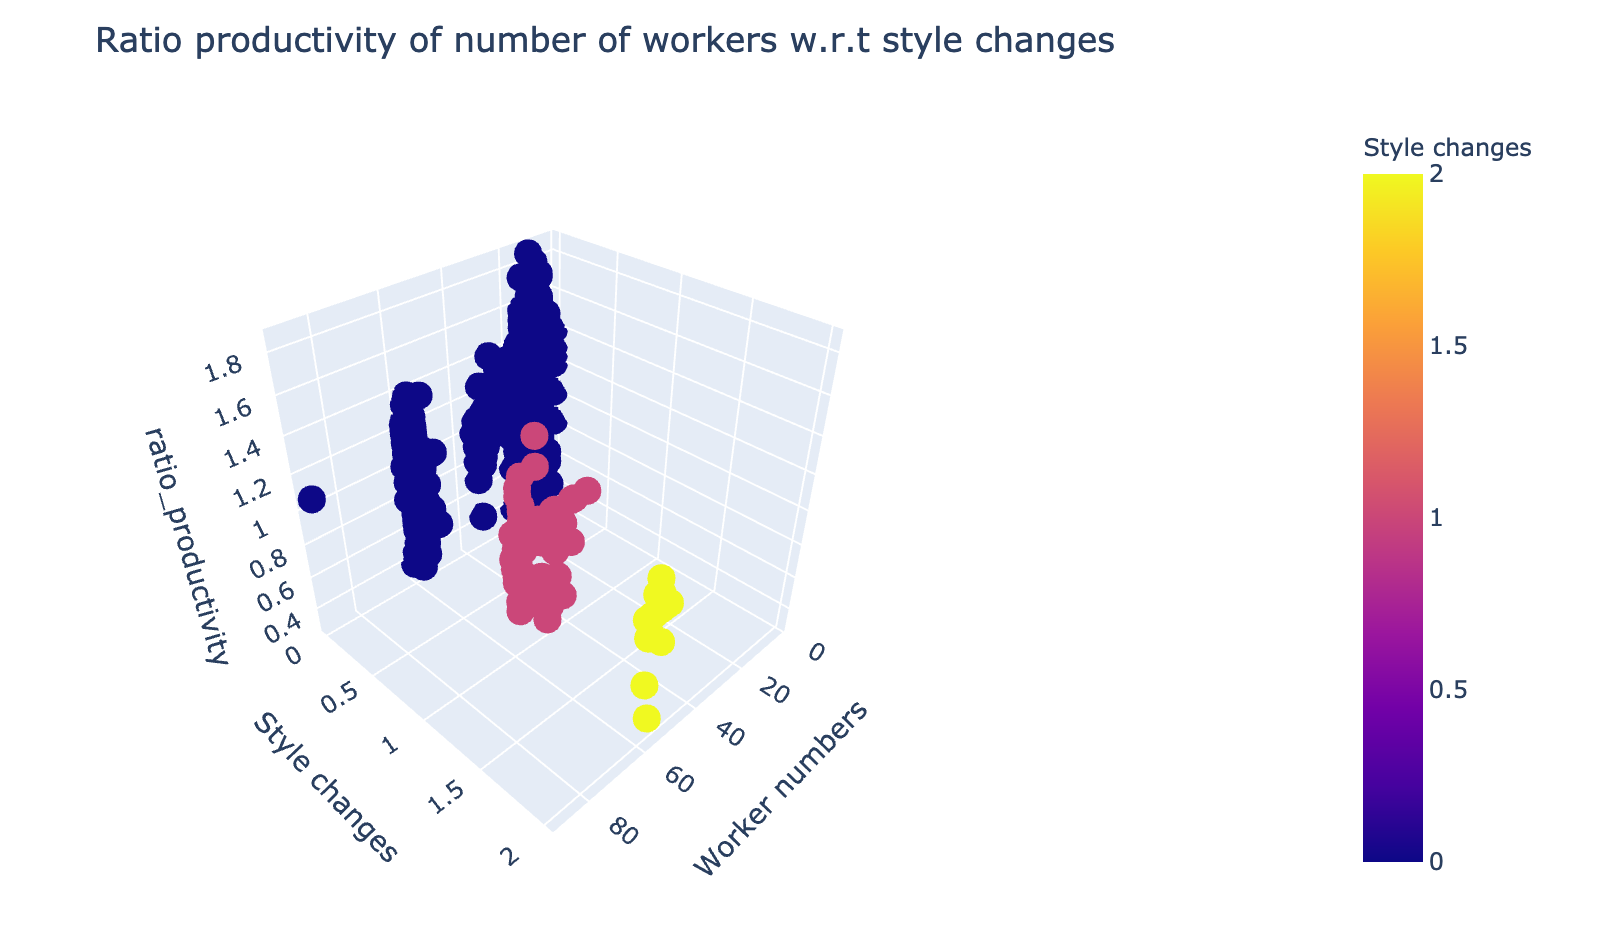

In [192]:
import plotly.express as px
#data = pd.read_csv('garments_worker_productivity.csv')
#df = data.copy()
df['ratio_productivity'] = df['actual_productivity']/ df['targeted_productivity']
df=df.drop(df[df['ratio_productivity']>2].index)

idf = df[['team', 'actual_productivity']].groupby('team').mean().sort_values('actual_productivity', ascending=True).reset_index()
print(idf)
fig = px.scatter_3d(
    df, 
    x="no_of_workers", 
    y="no_of_style_change", 
    z="ratio_productivity", 
    color="no_of_style_change", 
    color_discrete_map = {
        "no_of_workers": "blue", 
        "no_of_style_change": "green", 
        "ratio_productivity":"red"
    },
    labels= {
        'no_of_workers':'Worker numbers',
        'no_of_style_change' : 'Style changes',
        'targeted_productivity': 'Target productivity',
    },
)

fig.update_layout(
    title_text = 'Ratio productivity of number of workers w.r.t style changes', 
    title_x = 0.5,
)

fig.show()

## Actual productivity of team with different diversity in product and members

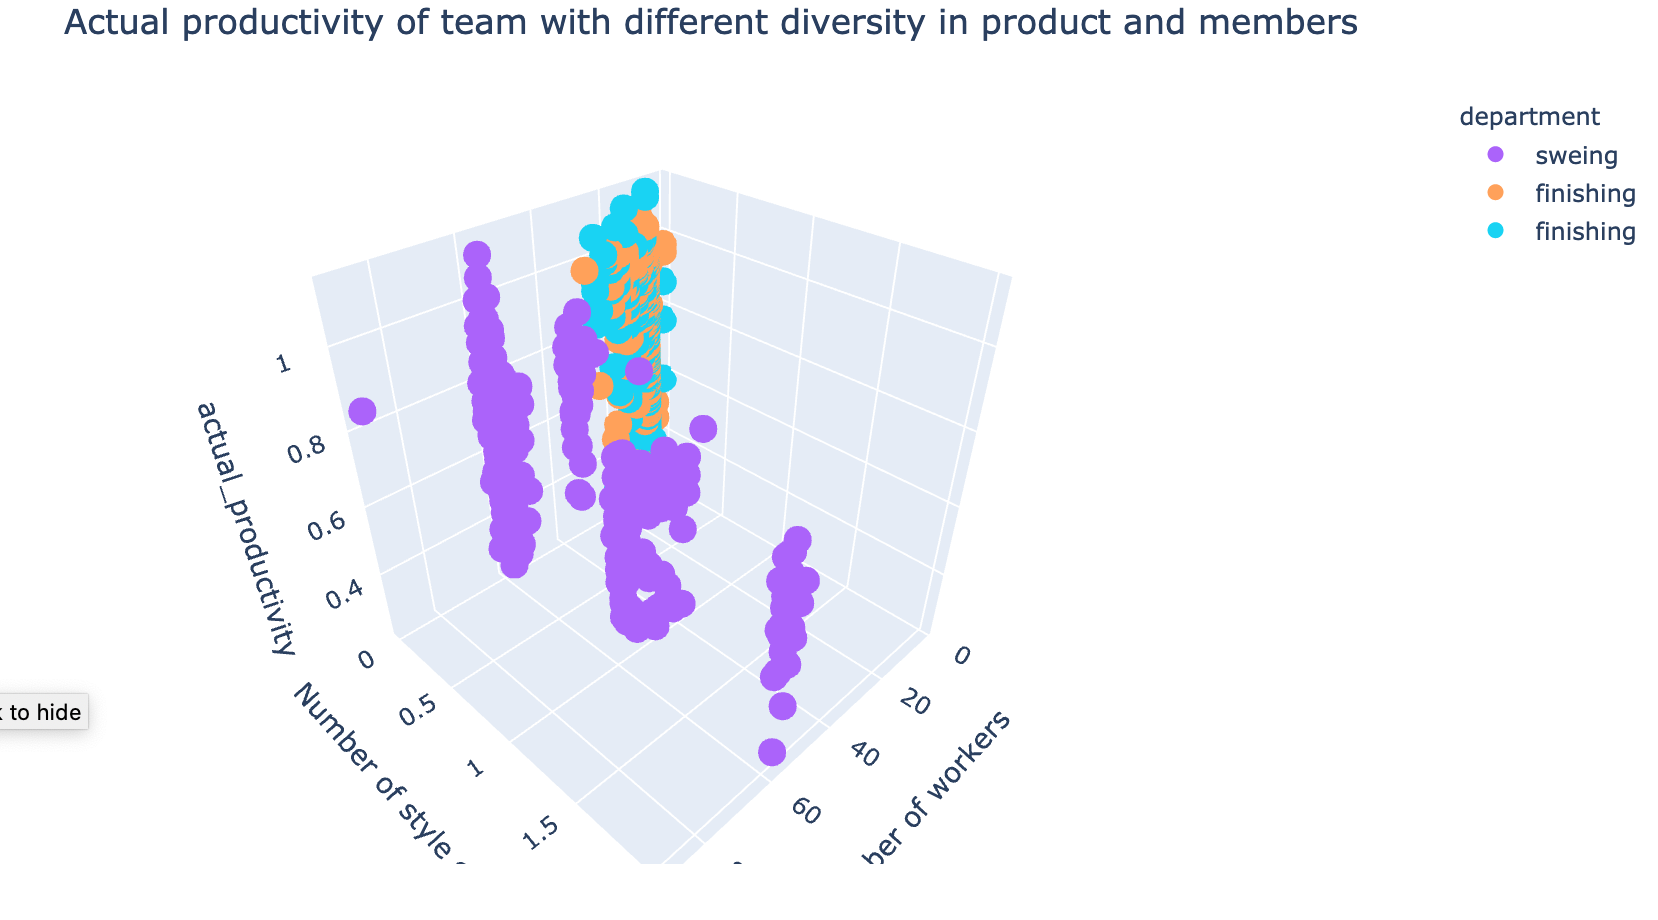

In [194]:
import plotly.express as px
data = pd.read_csv('garments_worker_productivity.csv')
df = data.copy()
idf = df[['team', 'actual_productivity']].groupby('team').mean().sort_values('actual_productivity', ascending=True).reset_index()
fig = px.scatter_3d(
    df, 
    x="no_of_workers", 
    y="no_of_style_change", 
    z="actual_productivity", 
    color="department", 
#     size="total", 
#     hover_name="district",
#     symbol="result", 
    
    color_discrete_map = {
        "no_of_workers": "blue", 
        "no_of_style_change": "green", 
        "targeted_productivity":"red"
    },
    labels= {
        'no_of_workers':' Number of workers',
        'no_of_style_change' : ' Number of style change',
        'targeted_productivity': 'Target productivity',
    },
)

fig.update_layout(
    title_text = 'Actual productivity of team with different diversity in product and members', 
    title_x = 0.5,
)

fig.show()

# 3.10 - Incentive

## Overview

         wip  actual_productivity  no_of_workers  incentive  over_time  \
0     1108.0             0.940725           59.0         98       7080   
1        NaN             0.886500            8.0          0        960   
2      968.0             0.800570           30.5         50       3660   
3      968.0             0.800570           30.5         50       3660   
4     1170.0             0.800382           56.0         50       1920   
...      ...                  ...            ...        ...        ...   
1192     NaN             0.628333            8.0          0        960   
1193     NaN             0.625625            8.0          0        960   
1194     NaN             0.625625            8.0          0        960   
1195     NaN             0.505889           15.0          0       1800   
1196     NaN             0.394722            6.0          0        720   

     month_name  department  
0       January      sweing  
1       January  finishing   
2       January      

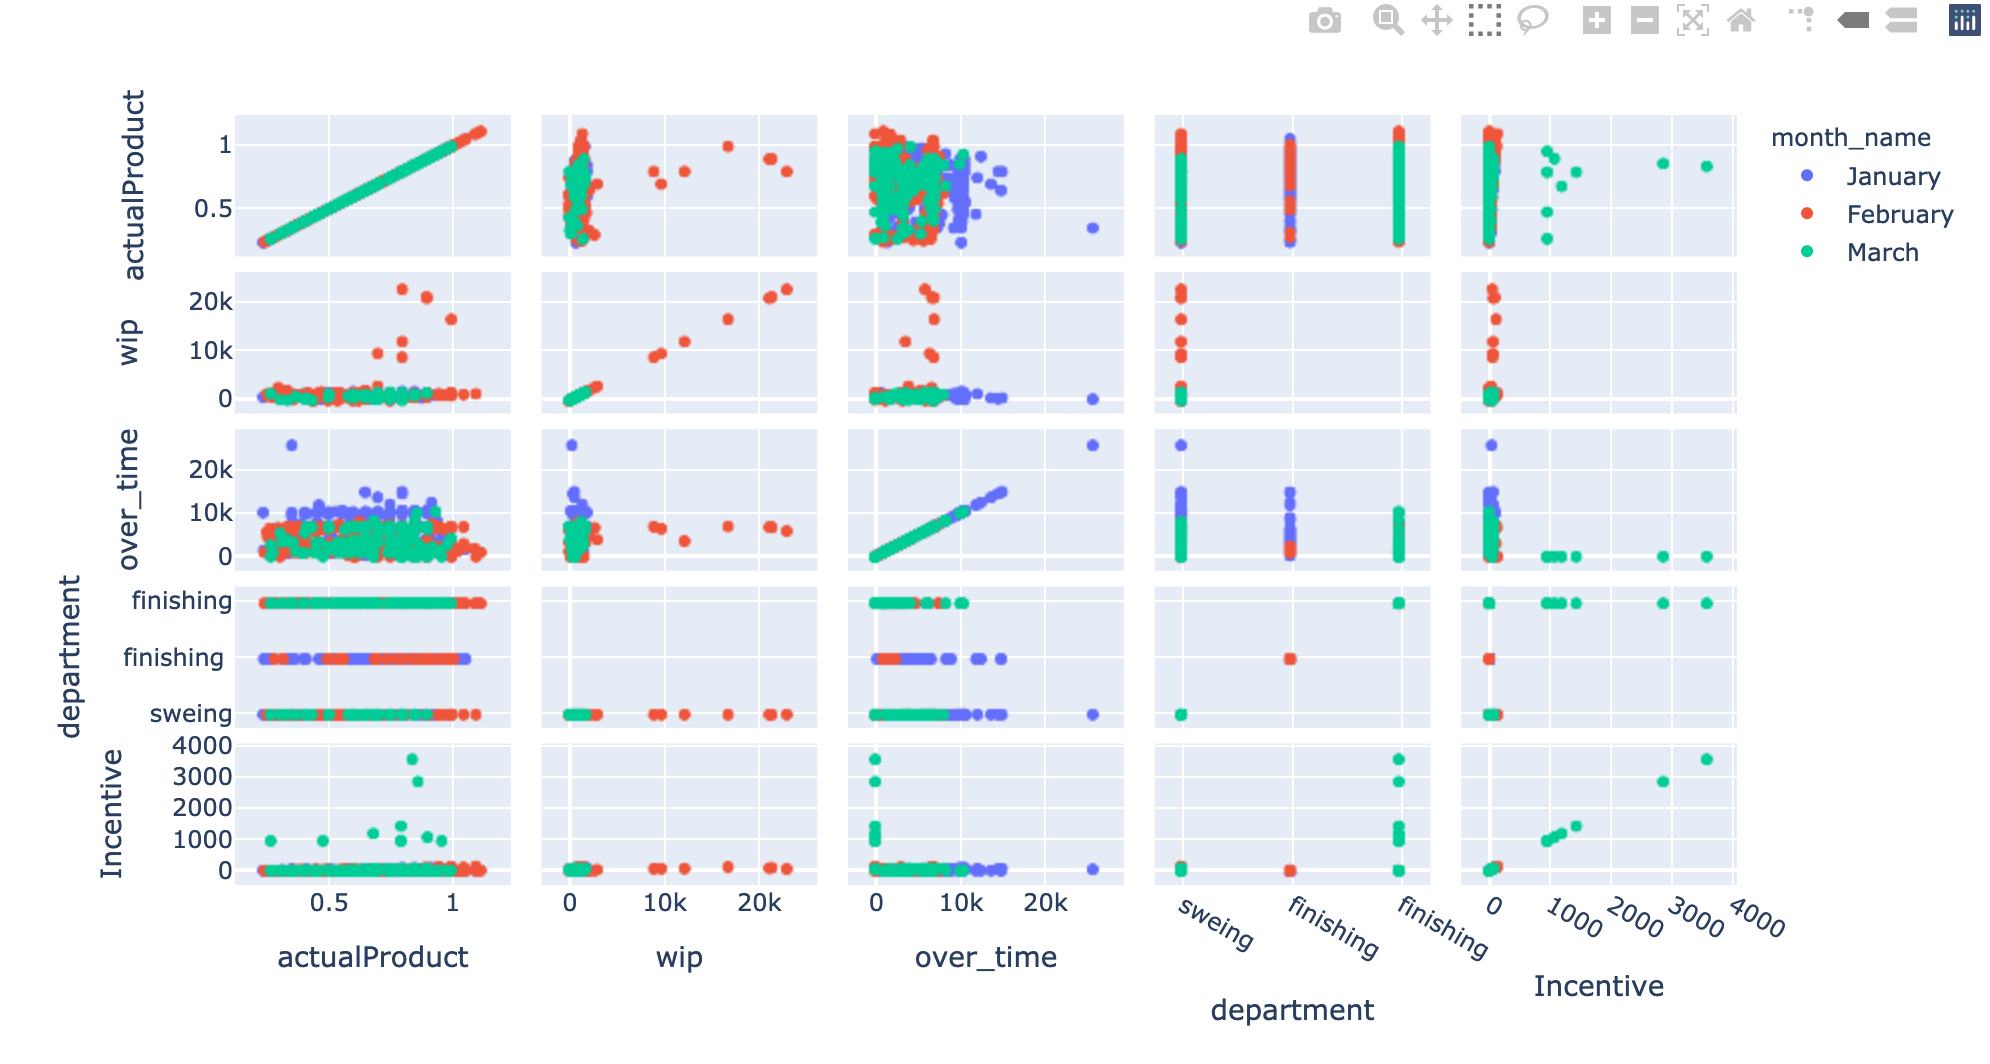

In [196]:
data = pd.read_csv('garments_worker_productivity.csv')
df = data.copy()
df['date'] = pd.to_datetime(df['date'])
df['month_name'] = df['date'].dt.month_name()

df_incentive=df[['wip','actual_productivity','no_of_workers','incentive','over_time','month_name','department']]
fig = px.scatter_matrix(df_incentive,
    dimensions=["actual_productivity", "wip",'over_time','department', "incentive"],    labels= {
        'incentive':'Incentive',
        'actual_productivity' : 'actualProduct',
    },
    color="month_name")
print(df_incentive)
fig.show()


## Incentive heat map with other attributes

                          wip  actual_productivity  incentive  no_of_workers  \
wip                  1.000000             0.131147   0.167210       0.030383   
actual_productivity  0.131147             1.000000   0.386507      -0.133291   
incentive            0.167210             0.386507   1.000000       0.612284   
no_of_workers        0.030383            -0.133291   0.612284       1.000000   
over_time            0.022302            -0.100334   0.445608       0.670207   

                     over_time  
wip                   0.022302  
actual_productivity  -0.100334  
incentive             0.445608  
no_of_workers         0.670207  
over_time             1.000000  


<AxesSubplot:>

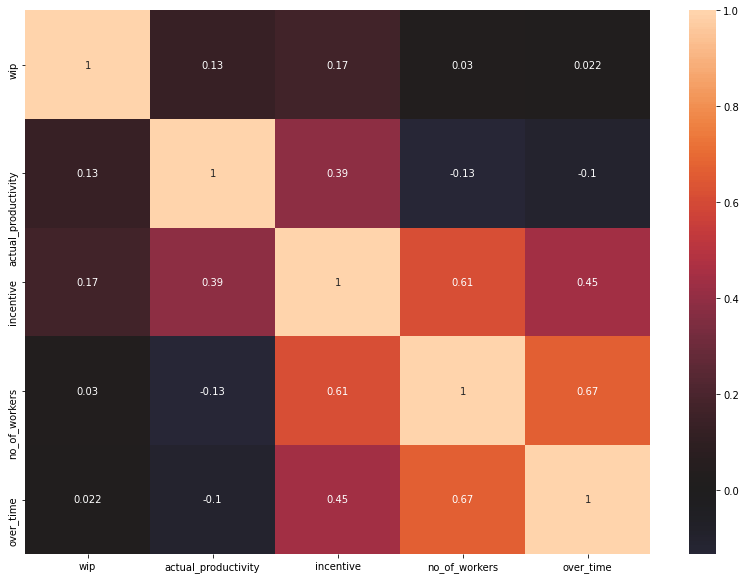

In [120]:
df_incentive=df[['wip','actual_productivity','incentive','no_of_workers','over_time','month_name']].drop(df[df['department']=='finishing'].index)
print(df_incentive.corr())
plt.figure(figsize=(14,10))
sns.heatmap(df_incentive.corr(), annot=True, center=0)

                          wip  actual_productivity  incentive  over_time
wip                  1.000000             0.169411   0.208012   0.115248
actual_productivity  0.169411             1.000000   0.696737  -0.204827
incentive            0.208012             0.696737   1.000000   0.053742
over_time            0.115248            -0.204827   0.053742   1.000000
        wip  actual_productivity  incentive  over_time month_name
542     NaN             1.011562          0        960   February
543  1396.0             1.000671        113       6900   February
544  1582.0             1.000402        113       3060   February
545     NaN             0.950439          0       2280   February
546  1124.0             0.950186        100       6840   February
..      ...                  ...        ...        ...        ...
974  1448.0             0.700237         40       6120   February
975   512.0             0.700211          0       4560   February
978   609.0             0.550404         

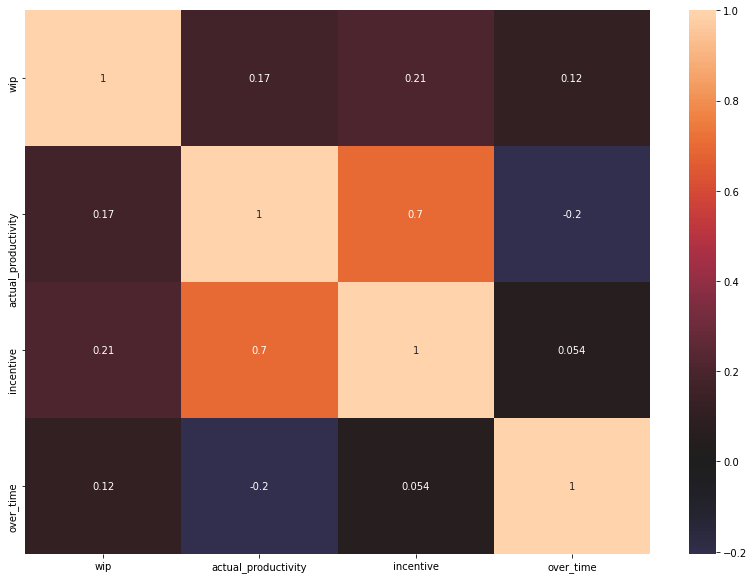

In [121]:
df_incentive=df[['wip','actual_productivity','incentive','over_time','month_name']].drop(df[(df['department']=='finishing')|(df['month_name']!='February')].index)
print(df_incentive.corr())
plt.figure(figsize=(14,10))
sns.heatmap(df_incentive.corr(), annot=True, center=0)
print(df_incentive)

## Incentive paid to each team

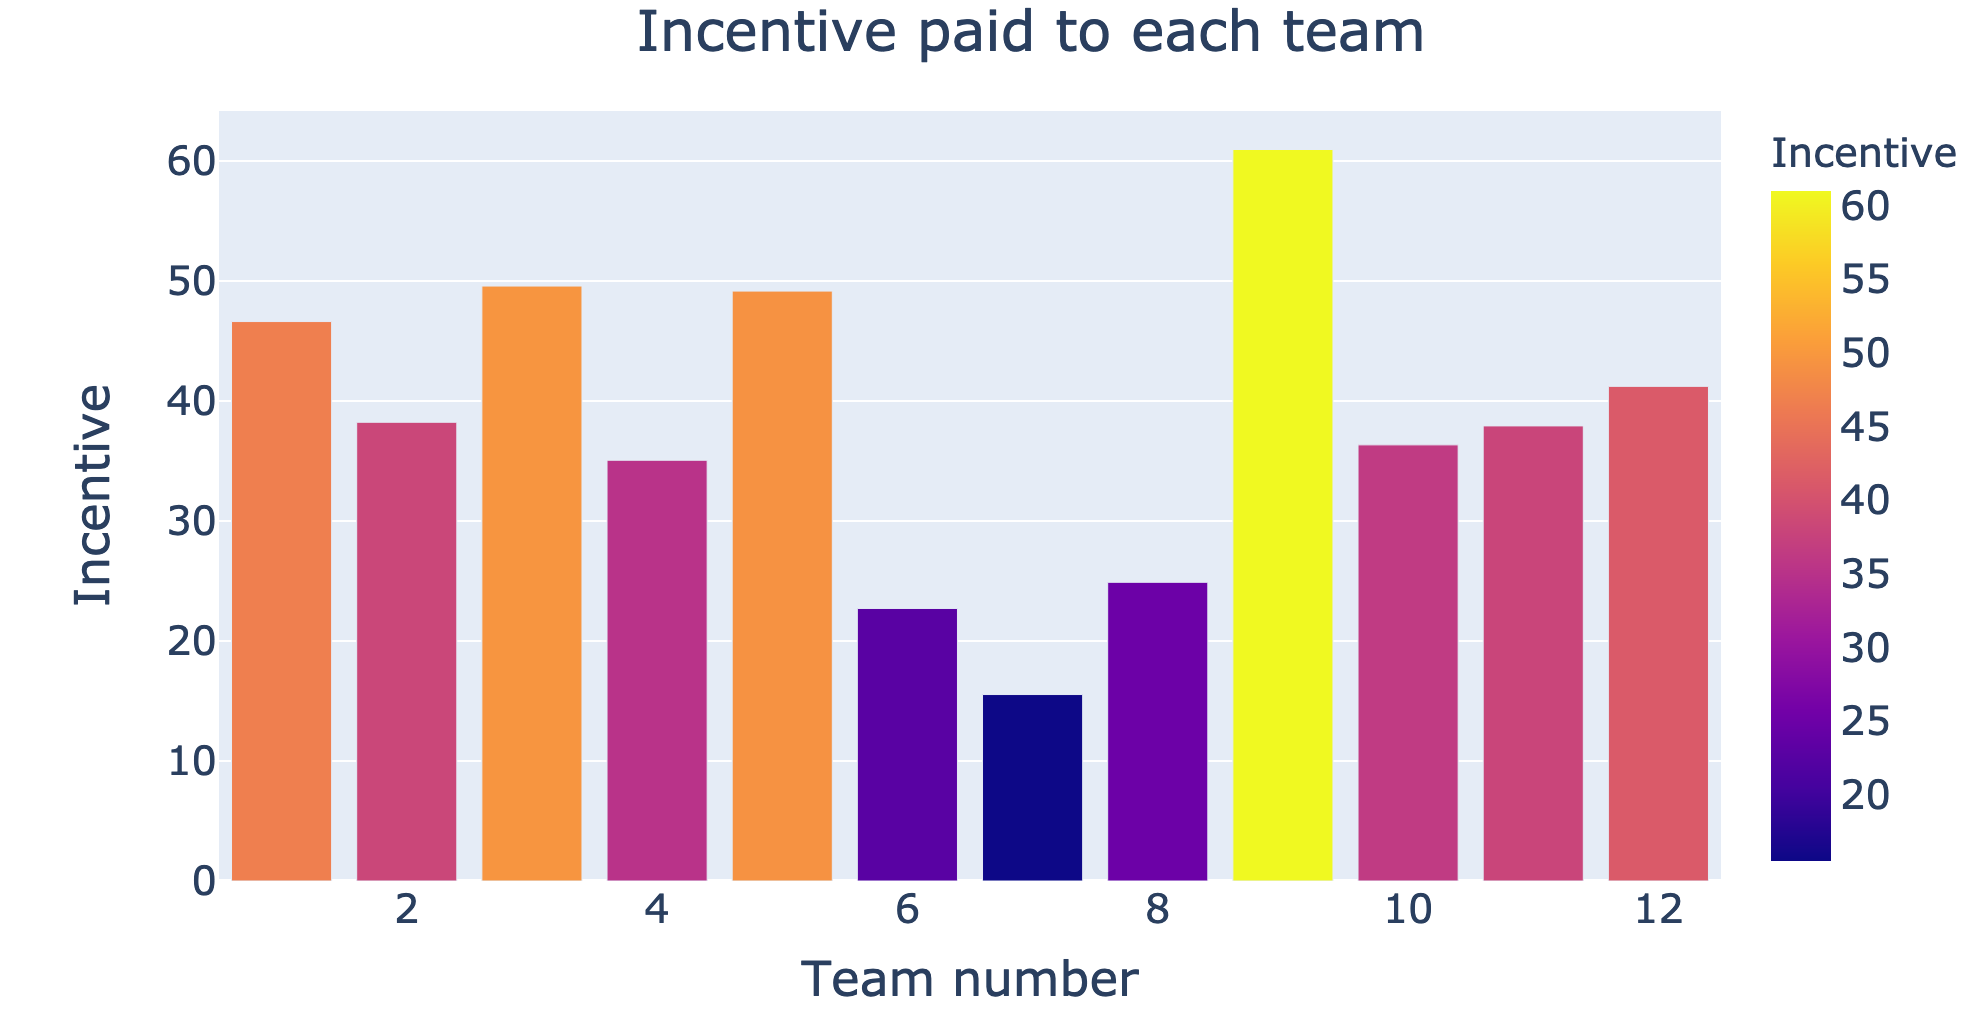

In [197]:
#data = pd.read_csv('garments_worker_productivity.csv')
#df = data.copy()
idf = df[['team', 'incentive']].groupby('team').mean().sort_values('incentive', ascending=True).reset_index()
fig = px.bar(
    idf, 
    x= "team", 
    y= "incentive", 
    barmode = "group",
    color = "incentive",
    labels= {
        'incentive':'Incentive',
        'team' : 'Team number',
    }
)


fig.update_layout(
    title_text = 'Incentive paid to each team', 
    title_x = 0.5,
    font = dict(
        size = 20,
    ))

fig.show() 

## Incentive paid to each team with respect to actual productivity

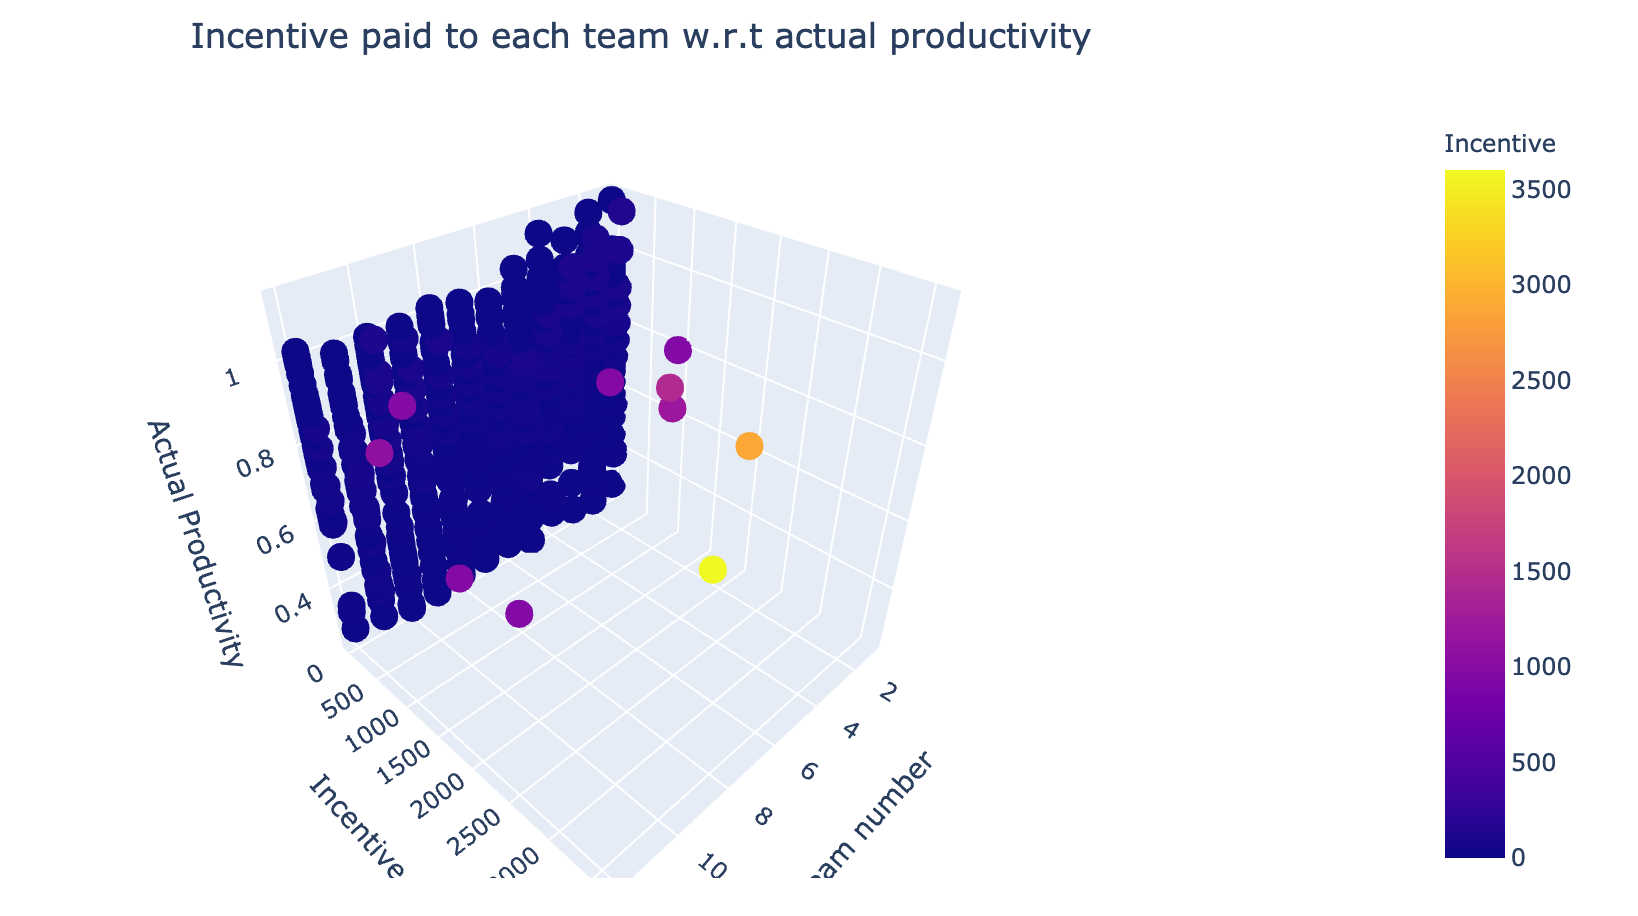

In [199]:
import plotly.express as px
#data = pd.read_csv('garments_worker_productivity.csv')
#df = data.copy()
idf = df[['team', 'incentive']].groupby('team').mean().sort_values('incentive', ascending=True).reset_index()
fig = px.scatter_3d(
    df, 
    x="team", 
    y="incentive", 
    z="actual_productivity", 
    color="incentive", 
    color_discrete_map = {
        "team": "blue", 
        "incentive": "green", 
        "actual_productivity":"red"
    },
    labels= {
        'incentive':'Incentive',
        'team' : 'Team number',
        'actual_productivity': 'Actual Productivity',
    },
)

fig.update_layout(
    title_text = 'Incentive paid to each team w.r.t actual productivity', 
    title_x = 0.5,
)

fig.show()

## Incentive paid to workers

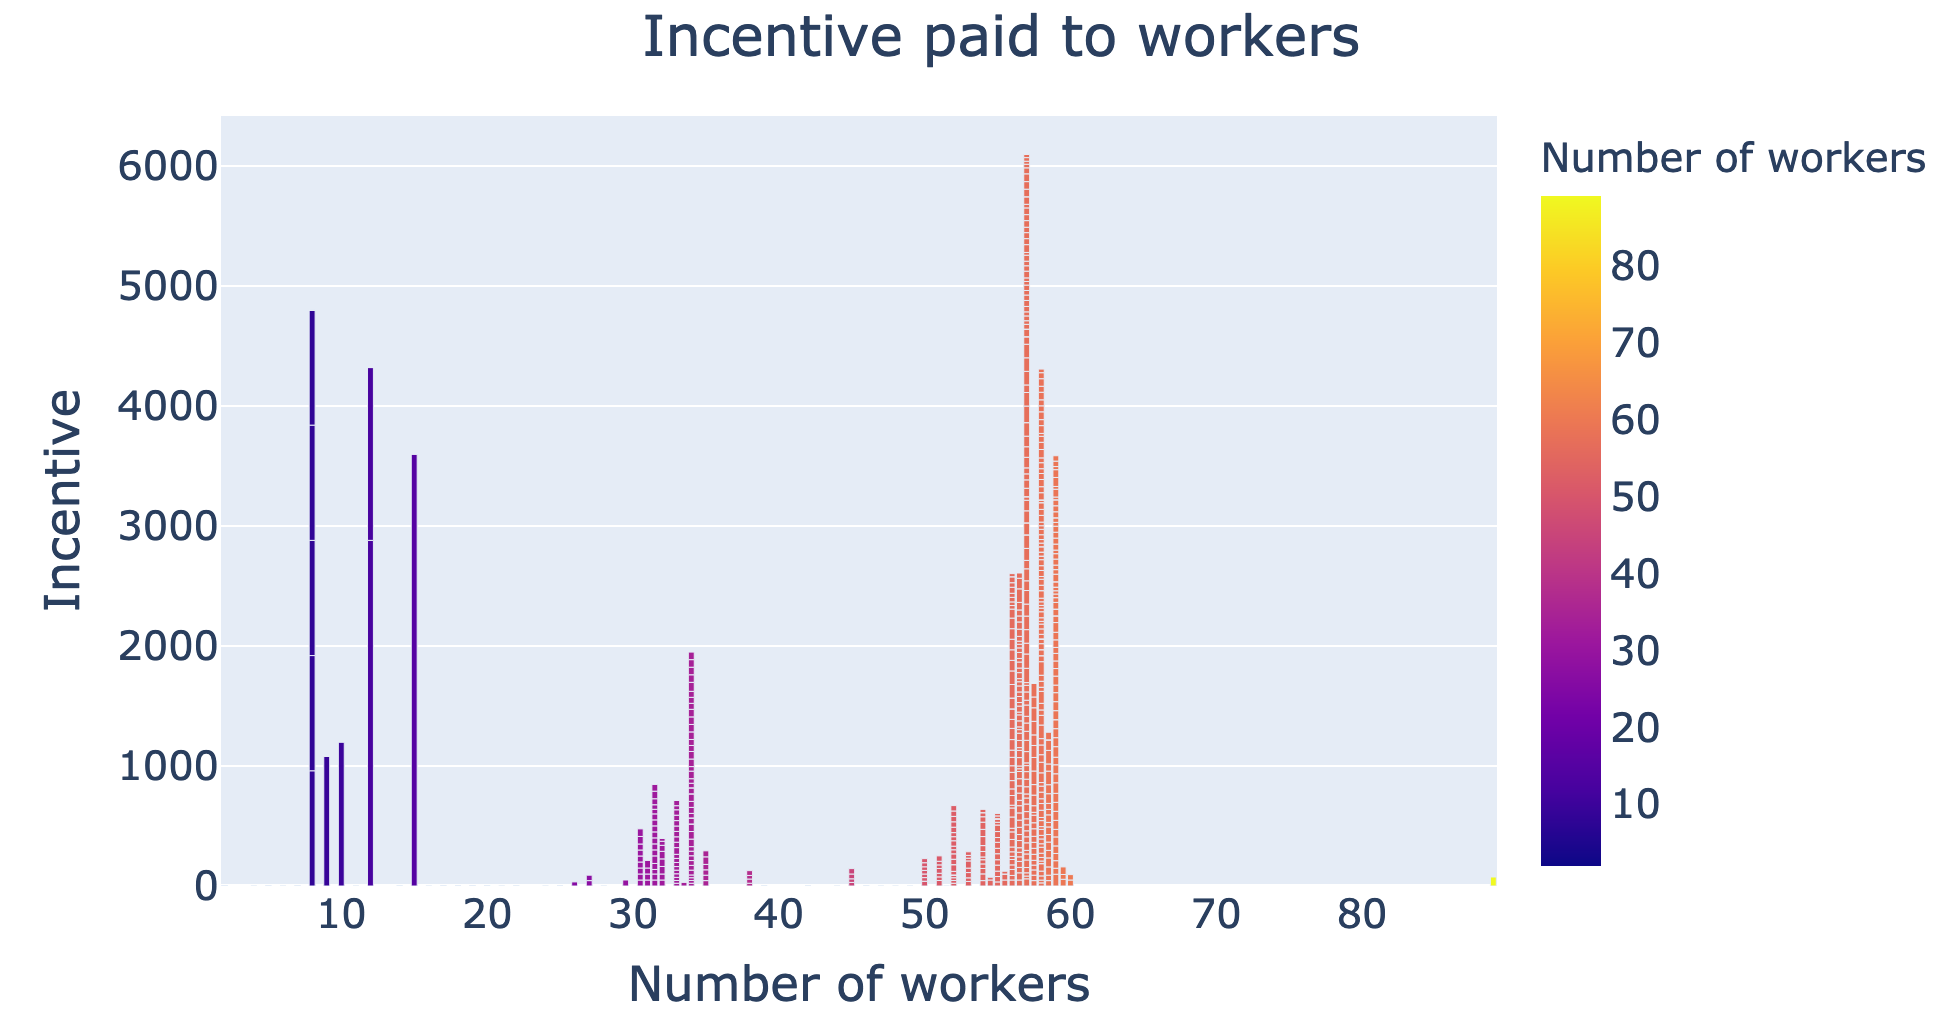

In [200]:
# data = pd.read_csv('garments_worker_productivity.csv')
# df = data.copy()

fig = px.bar(
    df, 
    x= "no_of_workers", 
    y= "incentive", 
    barmode = "group",
    color = "no_of_workers",
    labels= {
        'incentive':'Incentive',
        'no_of_workers' : 'Number of workers',
    }
)


fig.update_layout(
    title_text = 'Incentive paid to workers', 

    title_x = 0.5,
    font = dict(
        size = 20,
    ),
    
    legend = dict(
        x = 0,
        y = 1.0,
        bgcolor ='rgba(255, 255, 255, 0)',
        bordercolor ='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.1,
    bargroupgap=0.1,
)

fig.show() 

## Incentive paid to workers w.r.t months

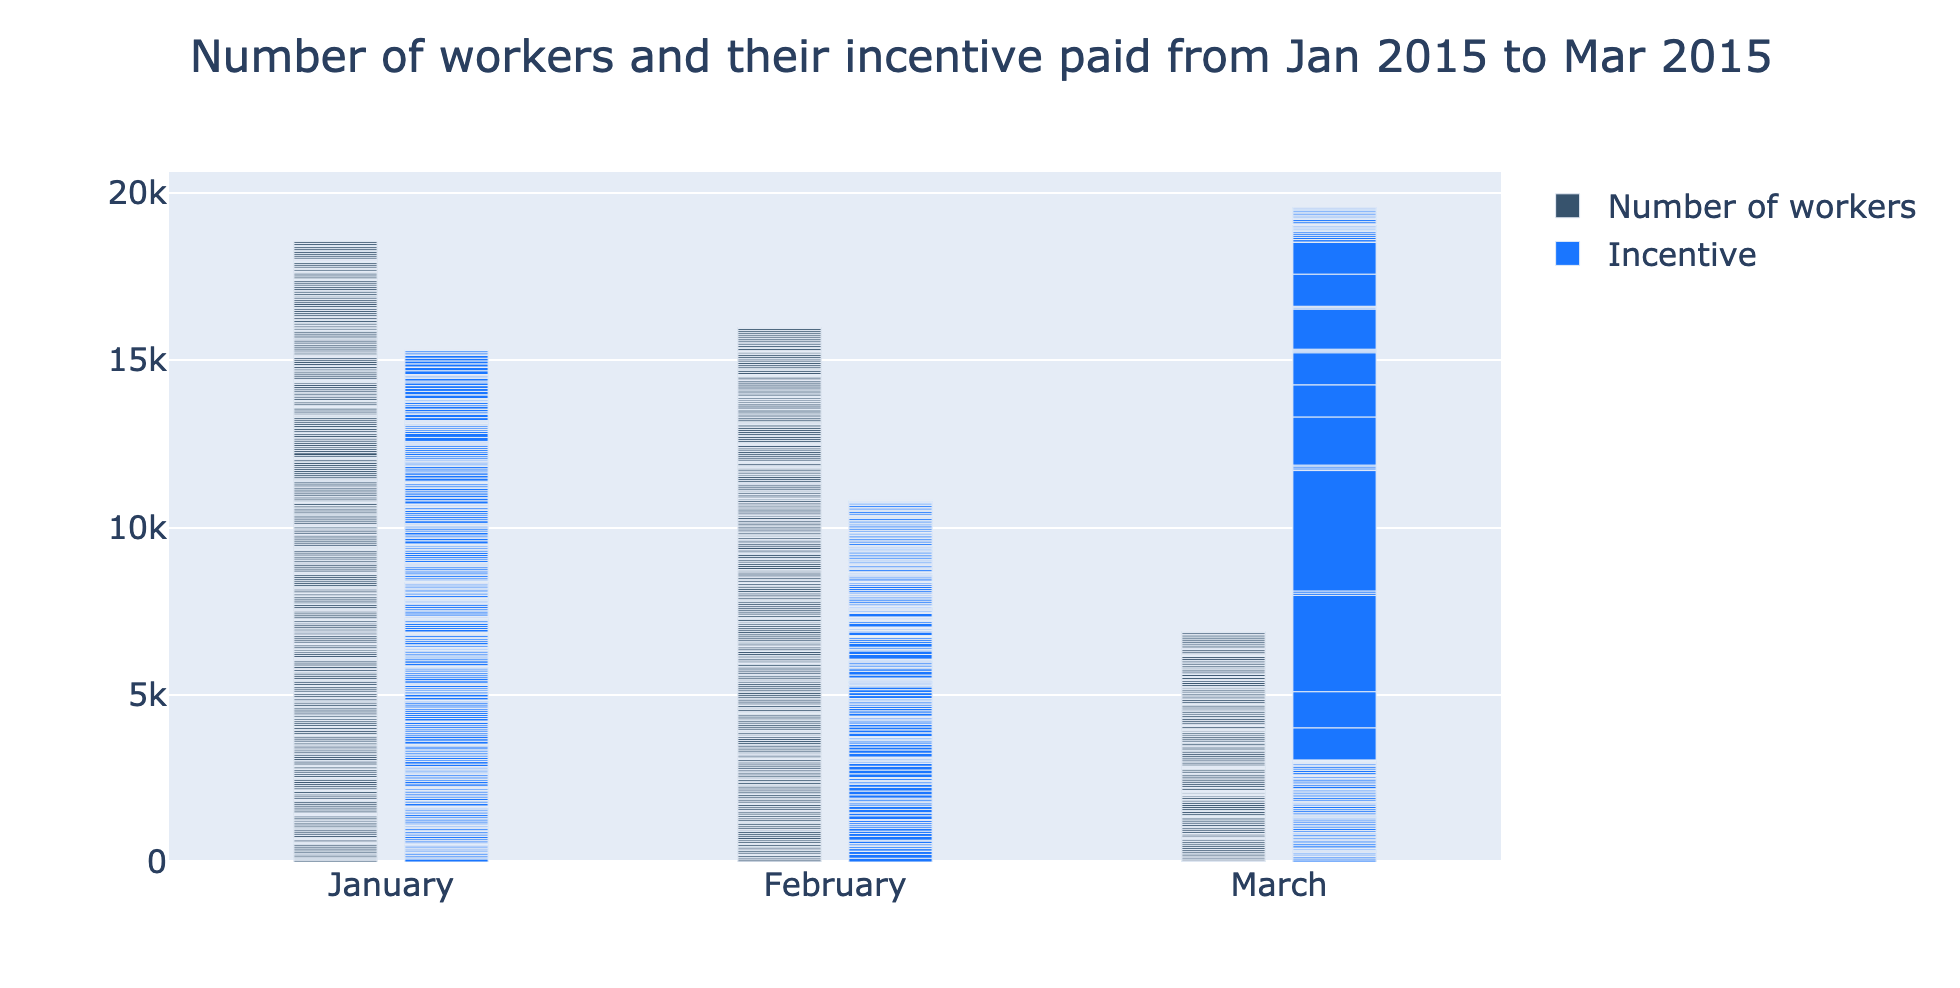

In [201]:
df['date'] = pd.to_datetime(df['date'])
df['month_name'] = df['date'].dt.month_name()
y1 = df['no_of_workers']
y2 = df['incentive']
x = df['month_name']

fig = go.Figure(data=[
    go.Bar(
        x = x,
        y = y1,
        marker_color='rgb(55, 83, 109)',
        name='Number of workers',
    ),
    go.Bar(
        x = x, 
        y = y2,
        marker_color='rgb(26, 118, 255)',
        name='Incentive ',
    ),
])
    
    
fig.update_layout(
    title ='Number of workers and their incentive paid from Jan 2015 to Mar 2015',
    title_x = 0.5,
    font = dict(
        size = 16,
    ),
    barmode='group',
    bargap = 0.5,
    bargroupgap = 0.25 
)

fig.show()

# 3.10 - Style change

<pre>
There is number of style change in quarter 5.
All number of style change occur in the sewing department
</pre>

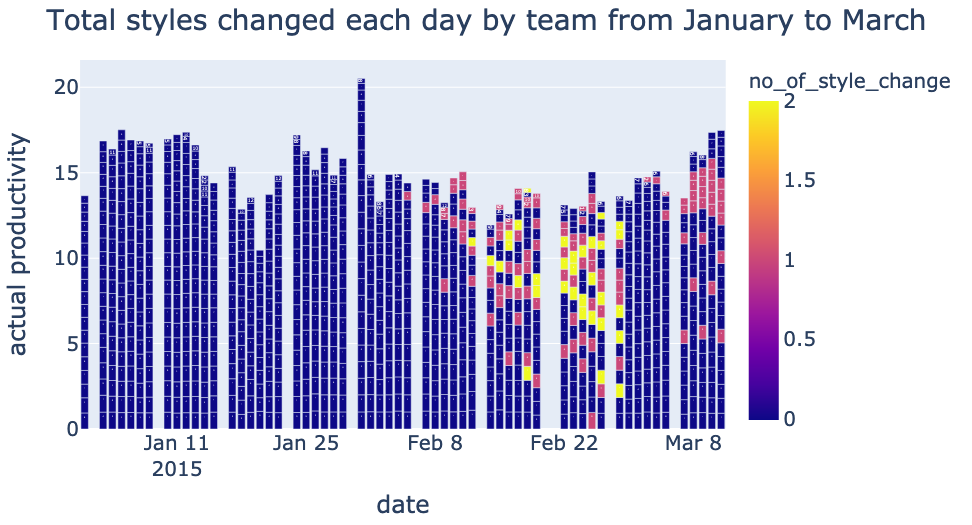

In [204]:
fig = px.bar(
    df, 
    x= "date", 
    y= "actual_productivity", 
     color = "no_of_style_change",
    text='team',
     labels= {
        'actual_productivity':'actual productivity',
        'day' : 'day of week',
        'count':'day of works'
    }
)
fig.update_traces(texttemplate='%{text:d}', textposition='inside',)

fig.update_layout(
     title_text = 'Total styles changed each day by team from January to March', 
    title_x = 0.5,
    font = dict(
        size = 20,
    ))

fig.show() 

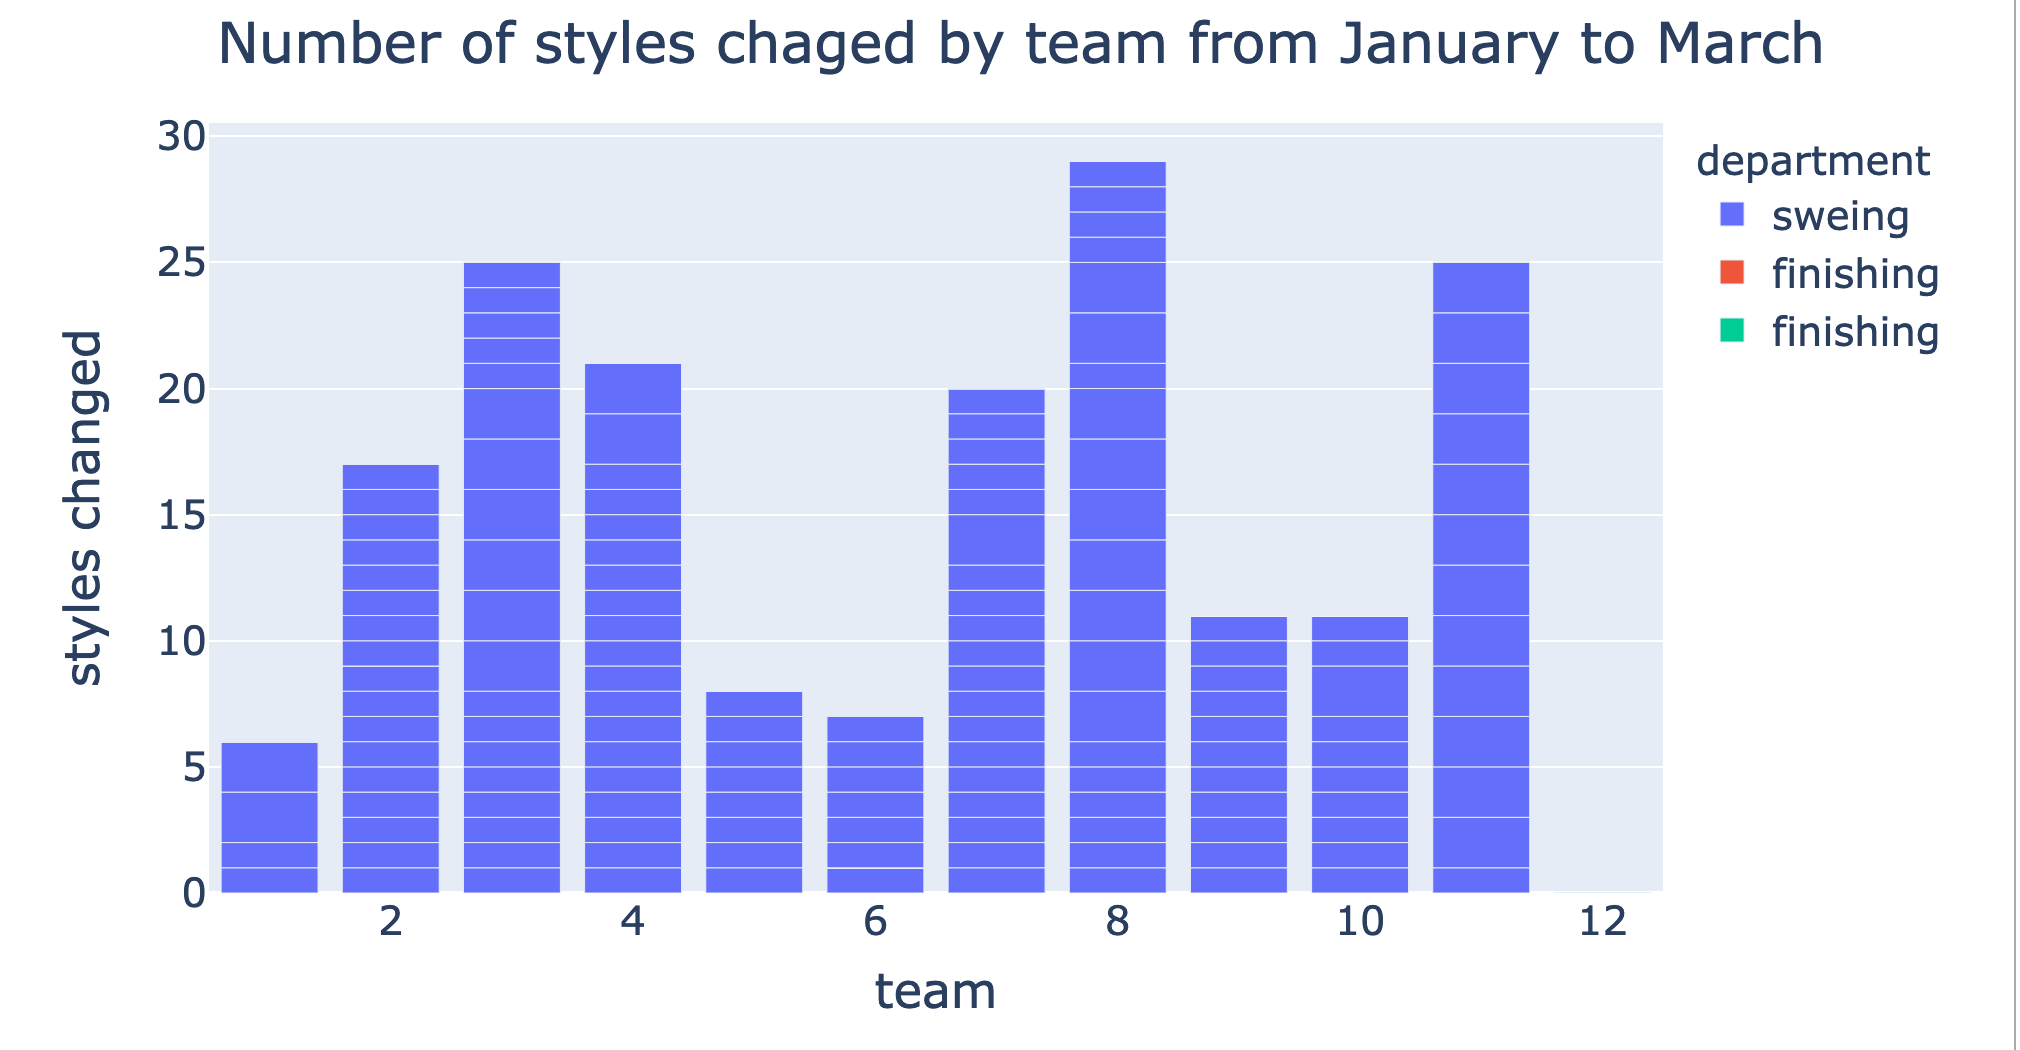

In [205]:
fig = px.bar(
    df, 
    x= "team", 
    y= "no_of_style_change", 
     color = "department",
      labels= {
        'actual_productivity':'actual productivity',
        'day' : 'day of week',
        'no_of_style_change':'styles changed'
    }
)
 
fig.update_layout(
    title_text = 'Number of styles chaged by team from January to March', 
    title_x = 0.5,
    font = dict(
        size = 20,
    ))

fig.show() 

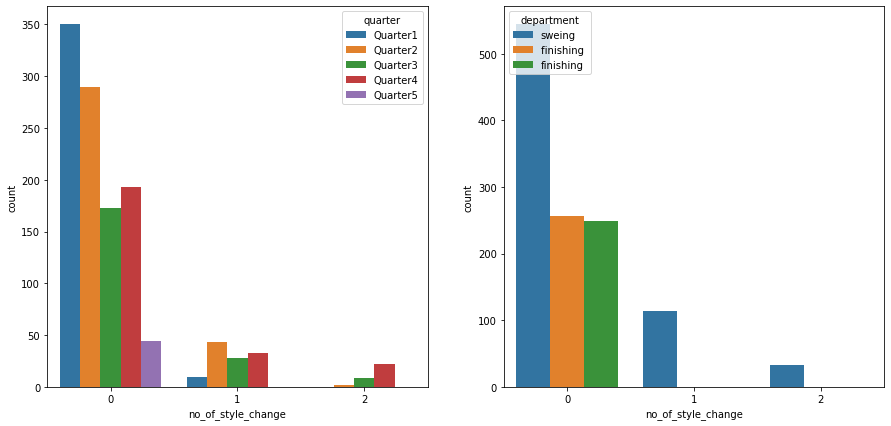

In [128]:
plt.figure(figsize=(15, 7))
palette='Set_2'

plt.subplot(1, 2, 1)
sns.countplot('no_of_style_change',hue='quarter',data=df)
plt.xlabel('no_of_style_change')

plt.subplot(1, 2, 2)
sns.countplot('no_of_style_change',hue='department',data=df)
plt.xlabel('no_of_style_change')

plt.show()

# 4 - One-hot encoding
<pre>
We use the following columns to predict productivity range:
  quarter
  department
  day
  team
  no_of_style_change
</pre>

In [129]:
path = "garments_worker_productivity.csv"
df=pd.read_csv(path, header=0, index_col=0, parse_dates=True, squeeze=True)
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df['wip'].fillna(0,inplace=True)
df['wip'].isnull().sum()

df = create_dummies(df,"quarter")
df = create_dummies(df,"department")
df = create_dummies(df,"day")
df = create_dummies(df,"team")

df['diff']=df.actual_productivity-df.targeted_productivity
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4', 'team_5',
       'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11', 'team_12',
       'diff'],
      dtype='object')

In [130]:
df['diff'].describe()

count    1197.000000
mean        0.005459
std         0.160082
min        -0.561958
25%        -0.009556
50%         0.000505
75%         0.099111
max         0.644375
Name: diff, dtype: float64

## Label Encoding Technique
<pre>
    Actual Productivity is bigger Productivity => Over perform.
    Actual Productivity is smaller Targeted Productivity => Under perform.
    Actual Productivity ~ Targeted Productivity => Expected range.
</pre>

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["no_of_style_change_enc"] = le.fit_transform(df["no_of_style_change"])
df.head()

quarter  department       day  team  targeted_productivity  \
date                                                                      
2015-01-01  Quarter1      sweing  Thursday     8                   0.80   
2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2015-01-01  Quarter1      sweing  Thursday    11                   0.80   
2015-01-01  Quarter1      sweing  Thursday    12                   0.80   
2015-01-01  Quarter1      sweing  Thursday     6                   0.80   

              smv     wip  over_time  incentive  idle_time  ...  team_5  \
date                                                        ...           
2015-01-01  26.16  1108.0       7080         98        0.0  ...       0   
2015-01-01   3.94     0.0        960          0        0.0  ...       0   
2015-01-01  11.41   968.0       3660         50        0.0  ...       0   
2015-01-01  11.41   968.0       3660         50        0.0  ...       0   
2015-01-01  25.90  1170.0       1920         50        0.0  ...       0   

            team_6  team_7  team_8  team_9  team_10  team_11  team_12  \
date                                                                    
2015-01-01       0       0       1       0        0        0        0   
2015-01-01       0       0       0       0        0        0        0   
2015-01-01       0       0       0       0        0        1        0   
2015-01-01       0       0       0       0        0        0        1   
2015-01-01       1       0       0       0        0        0        0   

                diff  no_of_style_change_enc  
date                                          
2015-01-01  0.140725                       0  
2015-01-01  0.136500                       0  
2015-01-01  0.000570                       0  
2015-01-01  0.000570                       0  
2015-01-01  0.000382                       0  

[5 rows x 42 columns]

In [132]:
df['diff']=df.actual_productivity-df.targeted_productivity
df['diff'].describe()

count    1197.000000
mean        0.005459
std         0.160082
min        -0.561958
25%        -0.009556
50%         0.000505
75%         0.099111
max         0.644375
Name: diff, dtype: float64

In [133]:
df['Target_label']=np.nan
df.head()
df.loc[df['diff']<0,'Target_label'] = -1
df.loc[(df['diff']==0), 'Target_label'] = 0
df.loc[df['diff']>0, 'Target_label'] = 1
df.head()

quarter  department       day  team  targeted_productivity  \
date                                                                      
2015-01-01  Quarter1      sweing  Thursday     8                   0.80   
2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2015-01-01  Quarter1      sweing  Thursday    11                   0.80   
2015-01-01  Quarter1      sweing  Thursday    12                   0.80   
2015-01-01  Quarter1      sweing  Thursday     6                   0.80   

              smv     wip  over_time  incentive  idle_time  ...  team_6  \
date                                                        ...           
2015-01-01  26.16  1108.0       7080         98        0.0  ...       0   
2015-01-01   3.94     0.0        960          0        0.0  ...       0   
2015-01-01  11.41   968.0       3660         50        0.0  ...       0   
2015-01-01  11.41   968.0       3660         50        0.0  ...       0   
2015-01-01  25.90  1170.0       1920         50        0.0  ...       1   

            team_7  team_8  team_9  team_10  team_11  team_12      diff  \
date                                                                      
2015-01-01       0       1       0        0        0        0  0.140725   
2015-01-01       0       0       0        0        0        0  0.136500   
2015-01-01       0       0       0        0        1        0  0.000570   
2015-01-01       0       0       0        0        0        1  0.000570   
2015-01-01       0       0       0        0        0        0  0.000382   

            no_of_style_change_enc  Target_label  
date                                              
2015-01-01                       0           1.0  
2015-01-01                       0           1.0  
2015-01-01                       0           1.0  
2015-01-01                       0           1.0  
2015-01-01                       0           1.0  

[5 rows x 43 columns]

In [134]:
df['Target_label'].value_counts()

 1.0    869
-1.0    322
 0.0      6
Name: Target_label, dtype: int64

In [135]:
df['Target_label'] = [-1 if x==-1 else 1 for x in df['Target_label']]
df['Target_label'].value_counts()

 1    875
-1    322
Name: Target_label, dtype: int64

In [136]:
df1=df.drop(['quarter', 'department', 'day', 'team'],axis=1)
df1

targeted_productivity    smv     wip  over_time  incentive  \
date                                                                     
2015-01-01                   0.80  26.16  1108.0       7080         98   
2015-01-01                   0.75   3.94     0.0        960          0   
2015-01-01                   0.80  11.41   968.0       3660         50   
2015-01-01                   0.80  11.41   968.0       3660         50   
2015-01-01                   0.80  25.90  1170.0       1920         50   
...                           ...    ...     ...        ...        ...   
2015-03-11                   0.75   2.90     0.0        960          0   
2015-03-11                   0.70   3.90     0.0        960          0   
2015-03-11                   0.65   3.90     0.0        960          0   
2015-03-11                   0.75   2.90     0.0       1800          0   
2015-03-11                   0.70   2.90     0.0        720          0   

            idle_time  idle_men  no_of_style_change  no_of_workers  \
date                                                                 
2015-01-01        0.0         0                   0           59.0   
2015-01-01        0.0         0                   0            8.0   
2015-01-01        0.0         0                   0           30.5   
2015-01-01        0.0         0                   0           30.5   
2015-01-01        0.0         0                   0           56.0   
...               ...       ...                 ...            ...   
2015-03-11        0.0         0                   0            8.0   
2015-03-11        0.0         0                   0            8.0   
2015-03-11        0.0         0                   0            8.0   
2015-03-11        0.0         0                   0           15.0   
2015-03-11        0.0         0                   0            6.0   

            actual_productivity  ...  team_6  team_7  team_8  team_9  team_10  \
date                             ...                                            
2015-01-01             0.940725  ...       0       0       1       0        0   
2015-01-01             0.886500  ...       0       0       0       0        0   
2015-01-01             0.800570  ...       0       0       0       0        0   
2015-01-01             0.800570  ...       0       0       0       0        0   
2015-01-01             0.800382  ...       1       0       0       0        0   
...                         ...  ...     ...     ...     ...     ...      ...   
2015-03-11             0.628333  ...       0       0       0       0        1   
2015-03-11             0.625625  ...       0       0       1       0        0   
2015-03-11             0.625625  ...       0       1       0       0        0   
2015-03-11             0.505889  ...       0       0       0       1        0   
2015-03-11             0.394722  ...       1       0       0       0        0   

            team_11  team_12      diff  no_of_style_change_enc  Target_label  
date                                                                          
2015-01-01        0        0  0.140725                       0             1  
2015-01-01        0        0  0.136500                       0             1  
2015-01-01        1        0  0.000570                       0             1  
2015-01-01        0        1  0.000570                       0             1  
2015-01-01        0        0  0.000382                       0             1  
...             ...      ...       ...                     ...           ...  
2015-03-11        0        0 -0.121667                       0            -1  
2015-03-11        0        0 -0.074375                       0            -1  
2015-03-11        0        0 -0.024375                       0            -1  
2015-03-11        0        0 -0.244111                       0            -1  
2015-03-11        0        0 -0.305278                       0            -1  

[1197 rows x 39 columns]

In [137]:
from imblearn.over_sampling import SMOTE
X = df1.loc[:, df1.columns != 'Target_label']
y = df1.Target_label
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)


In [138]:
X_smote.shape, y_smote.shape

((1750, 38), (1750,))

In [139]:
df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
df.shape

(1750, 39)

# Split training and test data

In [140]:
from sklearn.model_selection import train_test_split

columns = ['smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_workers', 
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change_enc']

X = df[columns]
y = df['Target_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=0)

In [141]:
X_train.shape

(1400, 33)

In [142]:
y_train.shape

(1400,)

In [143]:
X_test.shape

(350, 33)

In [144]:
y_test.shape

(350,)

In [145]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_score,recall_score,accuracy_score

# Machine learning classifier models training and assesment

In [147]:
df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score'
])
models_trained_list = []


def get_perf_metrics(model, i):
    model_name = type(model).__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df_perf_metrics.loc[i] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
    ]
   
    print("Completed {} model's performance assessment.".format(model_name))

In [148]:
models_list = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               SVC(),
               KNeighborsClassifier(),
               LinearDiscriminantAnalysis()
               ]

In [151]:
from IPython.display import Image
from sklearn.metrics import r2_score,f1_score
for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Completed DecisionTreeClassifier model's performance assessment.
Completed RandomForestClassifier model's performance assessment.
Completed SVC model's performance assessment.
Completed KNeighborsClassifier model's performance assessment.
Completed LinearDiscriminantAnalysis model's performance assessment.


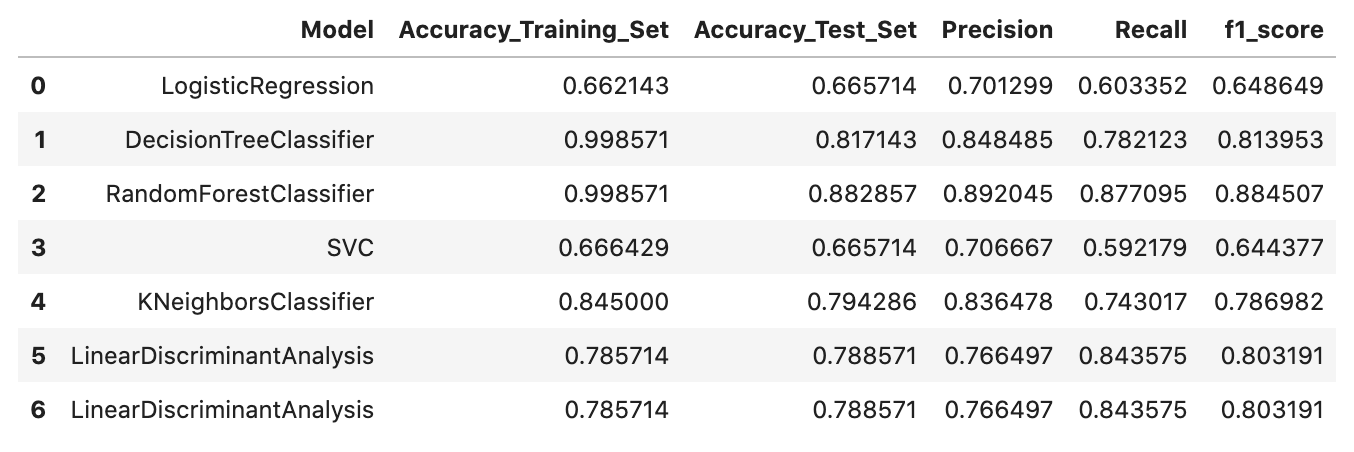

In [152]:
df_perf_metrics
Image(filename='results.PNG')